---
#<h1><center><font color='Blue'><font size=36> CV Capstone Project AIML</center></h1>
#<h1><center><font color='Red'><font size=36> Pneumonia Detection</center></h1>
#<h1><center><font color='green'><font size=26> Group 2 </center></h1>
---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#################################################################################################################################
#Import necessary packages to be used in the project, such as numpy,pandas,matplotlib,seaborn,scipy and statsmodels.
import numpy as np   #numpy is a package for all mathematical,logical calculation. It can be used to create and operate arrays.
import pandas as pd  #pandas is a package for data structures and operation.
import matplotlib.pyplot as plt  #matplotlib is a package for data visualization.
import scipy.stats as stats  #scipy is a package for mathematics, science and engineering.
import seaborn as sns  #seaborn is a package for data visualization.
import plotly.express as px
import time
import warnings
import glob
import os
import random
warnings.filterwarnings('ignore')
%matplotlib inline  
#Importing libraries from sklearn.
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

In [ ]:
#importing other Libraries.
from zipfile import ZipFile
import cv2
from PIL import Image
import imagesize

In [ ]:
!pip install pydicom
import pydicom as dicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Libraries for Neural Network.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization,Convolution2D,Flatten, MaxPooling2D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import backend
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
######################################################################################################################

### <h1><font color='maroon'><font size=18>Health Care: </h1></font> 
---


    

## <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#0e92ea">PROJECT OBJECTIVE: 
---
 Design a DL based algorithm for detecting pneumonia.

# <u>Milestone 1:</u>

## <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"><u> Process:</u>

---
## Step 1: Import the data.





In [ ]:
path = "/content/drive/MyDrive/AIML CAPSTONE/CV capstone dataset" #map the 'AIML CAPSTONE' folder from shared with me to 'MyDrive'.
dir_list = os.listdir(path)
print(dir_list)

['Notebooks', 'stage_2_train_images.zip', 'stage_2_sample_submission.csv', 'stage_2_detailed_class_info.csv', 'GCP Credits Request Link - RSNA.txt', 'stage_2_train_labels.csv', 'stage_2_test_images.zip', 'stage_2_train_images', 'Capstone.ipynb']


In [ ]:
#Read all csv files
class_info = pd.read_csv(path+'/stage_2_detailed_class_info.csv')

In [ ]:
train_labels = pd.read_csv(path+'/stage_2_train_labels.csv')

In [ ]:
class_info.head()

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

In [ ]:
class_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


In [ ]:
class_info['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [ ]:
train_labels.head(6)

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1
5  00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1

In [ ]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
#comparing patient id of train_labels & df_class_info
(train_labels['patientId'] == class_info['patientId']).value_counts()

#all the patient ids are equivalent in both the dataframes

True    30227
Name: patientId, dtype: int64

In [ ]:
#getting value count of Target column
train_labels['Target'].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

In [ ]:
#checking for duplicate values in class_info dataframe
class_info[class_info.duplicated()]

patientId         class
5      00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity
9      00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity
15     00aecb01-a116-45a2-956c-08d2fa55433f  Lung Opacity
17     00c0b293-48e7-4e16-ac76-9269ba535a62  Lung Opacity
20     00f08de1-517e-4652-a04f-d1dc9ee48593  Lung Opacity
...                                     ...           ...
30209  c18d1138-ba74-4af5-af21-bdd4d2c96bb5  Lung Opacity
30215  c1cddf32-b957-4753-acaa-472ab1447e86  Lung Opacity
30220  c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2  Lung Opacity
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  Lung Opacity
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  Lung Opacity

[3543 rows x 2 columns]

In [ ]:
class_info.duplicated().sum() #checking for duplicate values in class_info dataset

3543

In [ ]:
class_info['patientId'].nunique()#there are 26684 unique patient id

26684

<font size=2>No Duplicates row found in train_labels</font>

In [ ]:
train_labels.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

<font size=2> missing values indicates there are no bounding boxes and belongs to Target 0.</font>

In [ ]:
traindf = pd.concat([train_labels, class_info['class']], axis=1, join='inner')

In [ ]:
traindf.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity

In [ ]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [ ]:
bno=traindf.groupby('patientId')['Target'].sum()

In [ ]:
bno.value_counts(ascending=False)

0    20672
2     3266
1     2614
3      119
4       13
Name: Target, dtype: int64

--- 
## Step 2: Map training and testing images to its classes.

In [ ]:
image_train_path = '/content/drive/MyDrive/AIML CAPSTONE/CV capstone dataset/stage_2_train_images.zip'
image_test_path = '/content/drive/MyDrive/AIML CAPSTONE/CV capstone dataset/stage_2_test_images.zip'

In [ ]:
%%time
with ZipFile(image_train_path,'r') as zip:
  zip.extractall('/usr/stage_2_train_images')

CPU times: user 22.4 s, sys: 11.5 s, total: 33.9 s
Wall time: 54.5 s


In [ ]:
path_train='/usr/stage_2_train_images/stage_2_train_images'
dir_train_img = os.listdir(path_train)
len(dir_train_img)

26684

There are 26684 train images

In [ ]:
%%time
with ZipFile(image_test_path,'r') as zip:
  zip.extractall('/usr/stage_2_test_images')

CPU times: user 2.51 s, sys: 1.24 s, total: 3.75 s
Wall time: 4.66 s


In [ ]:
path_test='/usr/stage_2_test_images/stage_2_test_images'
dir_test_img = os.listdir(path_test)
len(dir_test_img)

3000

There are 3000 test images

In [ ]:
list_patientIds = traindf.drop_duplicates('patientId', keep = 'first').patientId.tolist()

In [ ]:
file_path = []      
Sex = []
Age = []
for patientId in list_patientIds:
    dcm_file = path_train+'/%s.dcm' % patientId
    file_path.append(dcm_file)
    dcm_data = dicom.read_file(dcm_file)
    Sex.append(dcm_data.PatientSex)
    Age.append(int(dcm_data.PatientAge))

In [ ]:
exten_train_info = pd.DataFrame({'patientId': list_patientIds, 'Sex': Sex, 'Age': Age,'path':file_path})

In [ ]:
exten_train_info.head()

patientId Sex  Age  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6   F   51   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd   F   48   
2  00322d4d-1c29-4943-afc9-b6754be640eb   M   19   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5   M   28   
4  00436515-870c-4b36-a041-de91049b9ab4   F   32   

                                                path  
0  /usr/stage_2_train_images/stage_2_train_images...  
1  /usr/stage_2_train_images/stage_2_train_images...  
2  /usr/stage_2_train_images/stage_2_train_images...  
3  /usr/stage_2_train_images/stage_2_train_images...  
4  /usr/stage_2_train_images/stage_2_train_images...

In [ ]:
final_traindf= exten_train_info.set_index('patientId').join(traindf.set_index('patientId'))[['Sex', 'Age','path','Target']]

In [ ]:
final_traindf['Target'].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

In [ ]:
final_traindf.head()

Sex  Age  \
patientId                                       
0004cfab-14fd-4e49-80ba-63a80b6bddd6   F   51   
000924cf-0f8d-42bd-9158-1af53881a557   F   19   
000db696-cf54-4385-b10b-6b16fbb3f985   F   25   
000db696-cf54-4385-b10b-6b16fbb3f985   F   25   
000fe35a-2649-43d4-b027-e67796d412e0   M   40   

                                                                                   path  \
patientId                                                                                 
0004cfab-14fd-4e49-80ba-63a80b6bddd6  /usr/stage_2_train_images/stage_2_train_images...   
000924cf-0f8d-42bd-9158-1af53881a557  /usr/stage_2_train_images/stage_2_train_images...   
000db696-cf54-4385-b10b-6b16fbb3f985  /usr/stage_2_train_images/stage_2_train_images...   
000db696-cf54-4385-b10b-6b16fbb3f985  /usr/stage_2_train_images/stage_2_train_images...   
000fe35a-2649-43d4-b027-e67796d412e0  /usr/stage_2_train_images/stage_2_train_images...   

                                      Target  
patientId                                     
0004cfab-14fd-4e49-80ba-63a80b6bddd6       0  
000924cf-0f8d-42bd-9158-1af53881a557       0  
000db696-cf54-4385-b10b-6b16fbb3f985       1  
000db696-cf54-4385-b10b-6b16fbb3f985       1  
000fe35a-2649-43d4-b027-e67796d412e0       1

In [ ]:
final_traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30227 entries, 0004cfab-14fd-4e49-80ba-63a80b6bddd6 to fffec09e-8a4a-48b1-b33e-ab4890ccd136
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sex     30227 non-null  object
 1   Age     30227 non-null  int64 
 2   path    30227 non-null  object
 3   Target  30227 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [ ]:
file_path_test = []
patientId_test = []
Sex_test = []
Age_test = []
for patientId in dir_test_img:
    dcm_file = path_test+'/%s' % patientId
    file_path_test.append(dcm_file)
    dcm_data = dicom.read_file(dcm_file)
    patientId_test.append(str(dcm_data.PatientID))
    Sex_test.append(dcm_data.PatientSex)
    Age_test.append(int(dcm_data.PatientAge))

In [ ]:
exten_test_info = pd.DataFrame({'patientId': patientId_test, 'Sex': Sex_test, 'Age': Age_test,'path':file_path_test})

In [ ]:
exten_test_info.head()

patientId Sex  Age  \
0  057a7499-4836-44ef-9490-56b002cd63c2   M   40   
1  1c0af194-eab2-4f27-9e00-03d7b9575ff6   F   41   
2  2dd86bb9-61ef-4efd-843b-da1b58ac5092   F   44   
3  1dfade34-d928-490c-971c-ffc485f686ab   M   32   
4  1e73864f-f136-46ac-b75e-6153a332e780   F   60   

                                                path  
0  /usr/stage_2_test_images/stage_2_test_images/0...  
1  /usr/stage_2_test_images/stage_2_test_images/1...  
2  /usr/stage_2_test_images/stage_2_test_images/2...  
3  /usr/stage_2_test_images/stage_2_test_images/1...  
4  /usr/stage_2_test_images/stage_2_test_images/1...

In [ ]:
exten_test_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  3000 non-null   object
 1   Sex        3000 non-null   object
 2   Age        3000 non-null   int64 
 3   path       3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


---
## Step 3: Map training and testing images to its annotations.

<font size = 2> We've extracted the annotation information in Step 2.
Continuing with Mapping below.</font>

In [ ]:
final_traindf_annot = exten_train_info.set_index('patientId').join(traindf.set_index('patientId'))[['Sex', 'Age', 'x', 'y', 'width', 'height','path','Target']]

In [ ]:
final_traindf_annot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30227 entries, 0004cfab-14fd-4e49-80ba-63a80b6bddd6 to fffec09e-8a4a-48b1-b33e-ab4890ccd136
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     30227 non-null  object 
 1   Age     30227 non-null  int64  
 2   x       9555 non-null   float64
 3   y       9555 non-null   float64
 4   width   9555 non-null   float64
 5   height  9555 non-null   float64
 6   path    30227 non-null  object 
 7   Target  30227 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 2.1+ MB


In [ ]:
final_traindf_annot.head()

Sex  Age      x      y  width  height  \
patientId                                                                    
0004cfab-14fd-4e49-80ba-63a80b6bddd6   F   51    NaN    NaN    NaN     NaN   
000924cf-0f8d-42bd-9158-1af53881a557   F   19    NaN    NaN    NaN     NaN   
000db696-cf54-4385-b10b-6b16fbb3f985   F   25  316.0  318.0  170.0   478.0   
000db696-cf54-4385-b10b-6b16fbb3f985   F   25  660.0  375.0  146.0   402.0   
000fe35a-2649-43d4-b027-e67796d412e0   M   40  570.0  282.0  269.0   409.0   

                                                                                   path  \
patientId                                                                                 
0004cfab-14fd-4e49-80ba-63a80b6bddd6  /usr/stage_2_train_images/stage_2_train_images...   
000924cf-0f8d-42bd-9158-1af53881a557  /usr/stage_2_train_images/stage_2_train_images...   
000db696-cf54-4385-b10b-6b16fbb3f985  /usr/stage_2_train_images/stage_2_train_images...   
000db696-cf54-4385-b10b-6b16fbb3f985  /usr/stage_2_train_images/stage_2_train_images...   
000fe35a-2649-43d4-b027-e67796d412e0  /usr/stage_2_train_images/stage_2_train_images...   

                                      Target  
patientId                                     
0004cfab-14fd-4e49-80ba-63a80b6bddd6       0  
000924cf-0f8d-42bd-9158-1af53881a557       0  
000db696-cf54-4385-b10b-6b16fbb3f985       1  
000db696-cf54-4385-b10b-6b16fbb3f985       1  
000fe35a-2649-43d4-b027-e67796d412e0       1

---
## Step 4: Preprocessing and Visualisation of different classes.

Text(0.5, 1.0, 'Count plot for Target')

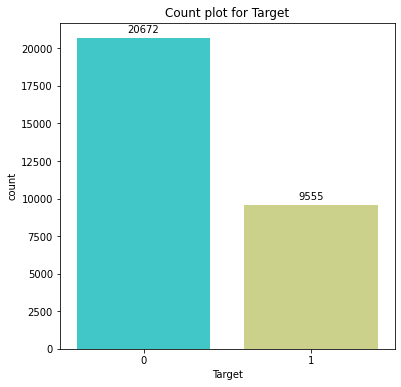

In [ ]:
#plotting a count plot on Target data
fig, ax = plt.subplots(nrows=1,figsize=(6,6))
ax = sns.countplot(data = train_labels, x = 'Target',palette='rainbow')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Count plot for Target')

In [ ]:
traindf['class'].unique()

array(['No Lung Opacity / Not Normal', 'Normal', 'Lung Opacity'],
      dtype=object)

In [ ]:
traindf.groupby(['class','Target']).size().reset_index(name='Patient Counts')

class  Target  Patient Counts
0                  Lung Opacity       1            9555
1  No Lung Opacity / Not Normal       0           11821
2                        Normal       0            8851

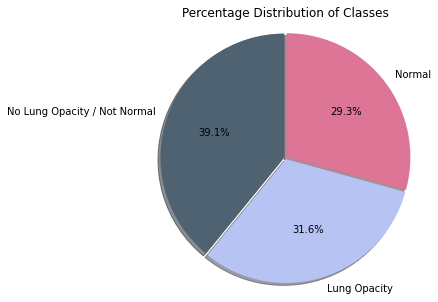

In [ ]:
label_count=traindf['class'].value_counts()
explode = (0.01,0.01,0.01)  
colors = ['#4F6272', '#B7C3F3', '#DD7596']
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(label_count.values, explode=explode, labels=label_count.index,      autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colors)
ax1.axis('equal') 
plt.title('Percentage Distribution of Classes')
plt.show()

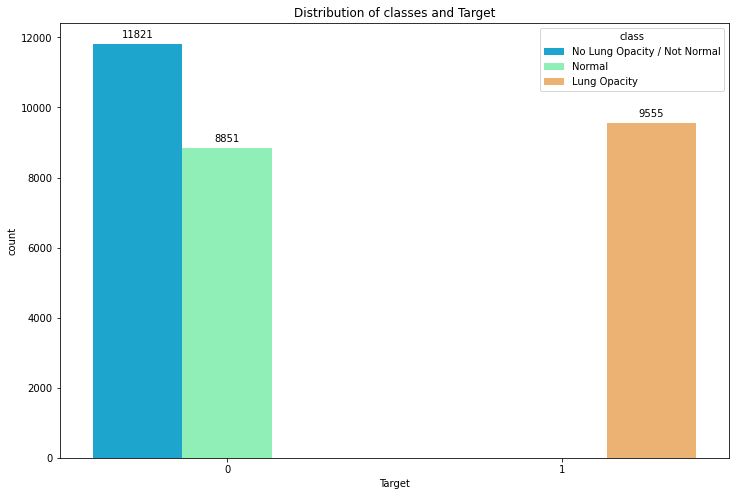

In [ ]:
fig, ax = plt.subplots(nrows=1,figsize=(12,8))
tmp = traindf.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data={'count': tmp.values}, index=tmp.index).reset_index()#test or count
ax = sns.barplot(ax=ax,x = 'Target', y='count',hue='class',data=df, palette='rainbow')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title("Distribution of classes and Target")
plt.show()

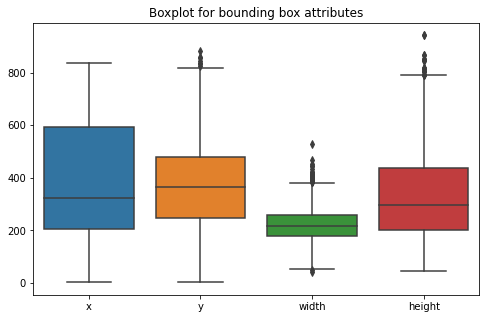

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=traindf[['x','y','width','height']])
plt.title("Boxplot for bounding box attributes");

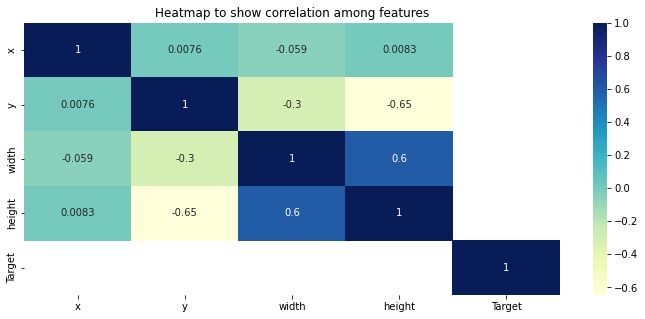

In [ ]:
corr = traindf.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.title("Heatmap to show correlation among features");

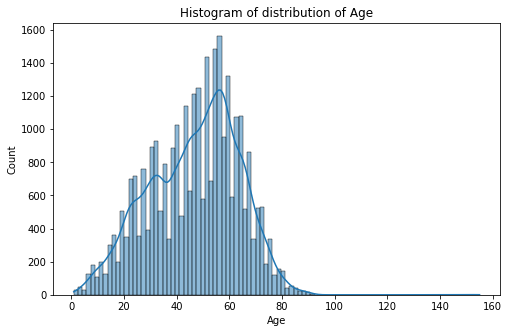

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(final_traindf_annot['Age'], kde=True)
plt.title("Histogram of distribution of Age");

Distribution of `Age`: Overall and Target = 1


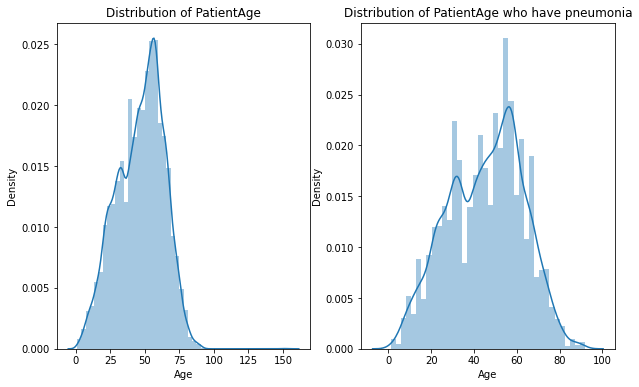

In [ ]:
print('Distribution of `Age`: Overall and Target = 1')
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(121)
g = (sns.distplot(final_traindf_annot['Age']).set_title('Distribution of PatientAge'),)

ax = fig.add_subplot(122)
g = (sns.distplot(final_traindf_annot.loc[final_traindf_annot['Target'] == 1, 'Age']).set_title('Distribution of PatientAge who have pneumonia'))


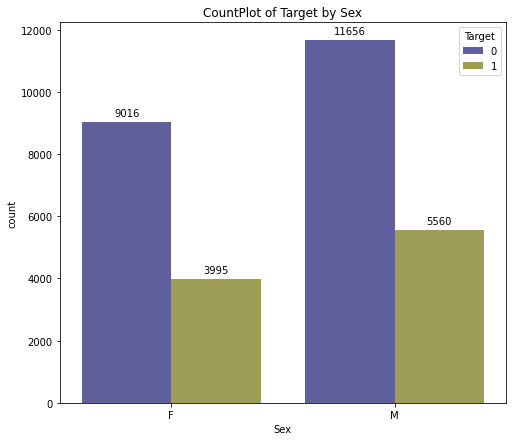

In [ ]:
plt.figure(figsize=(8,7))
ax = sns.countplot(final_traindf_annot['Sex'], hue=final_traindf_annot['Target'],palette='gist_stern')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title("CountPlot of Target by Sex");

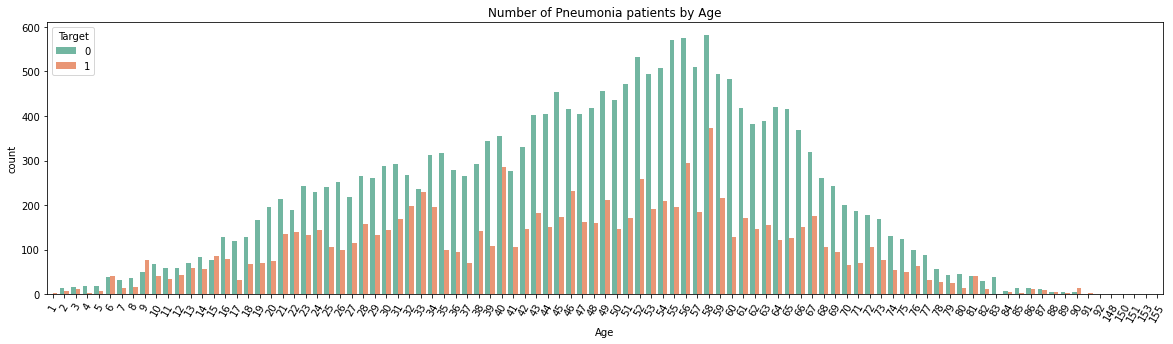

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=final_traindf_annot["Age"], hue=final_traindf_annot["Target"],palette='Set2')
ax.set_title('Number of Pneumonia patients by Age')
labels = ['0','1']
h,l = ax.get_legend_handles_labels()
ax.legend(h,labels,title="Target")
plt.xticks(rotation=60);

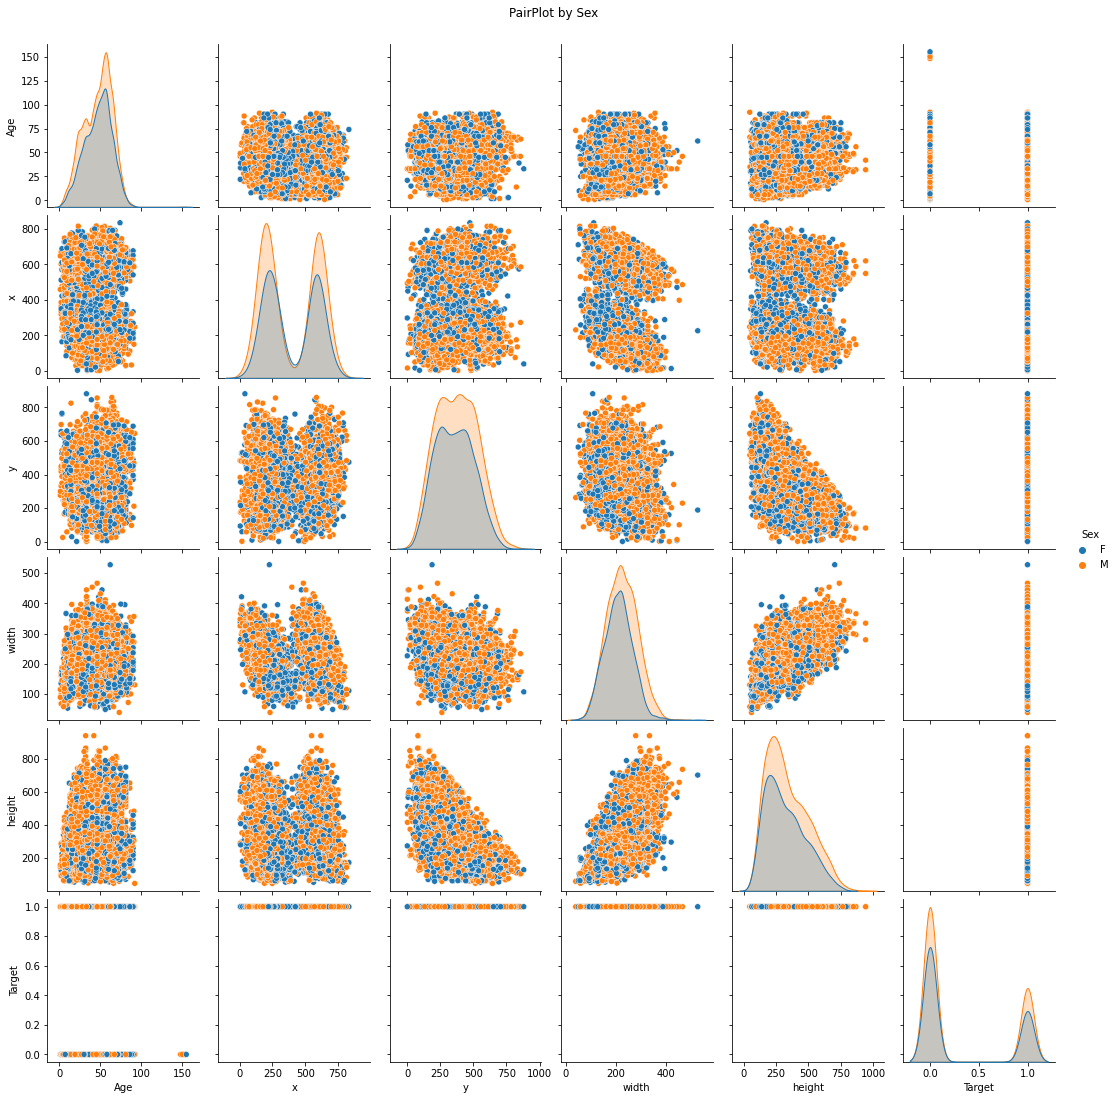

In [ ]:
g = sns.pairplot(final_traindf_annot.reset_index(),hue="Sex")
g.fig.suptitle("PairPlot by Sex", y=1.02); #plotting pairplot

In [ ]:
final_traindf_annot=final_traindf_annot.reset_index()

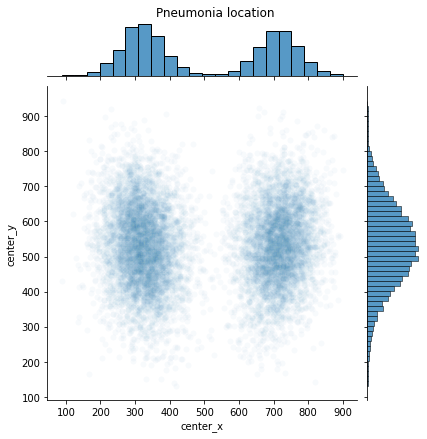

In [ ]:
centers = (final_traindf_annot.dropna(subset=['x'])
           .assign(center_x=final_traindf_annot.x + final_traindf_annot.width / 2, 
                   center_y=final_traindf_annot.y + final_traindf_annot.height / 2))
ax = sns.jointplot("center_x", "center_y", data=centers, height=6, alpha=0.03)
_ = ax.fig.suptitle("Pneumonia location", y=1.01)

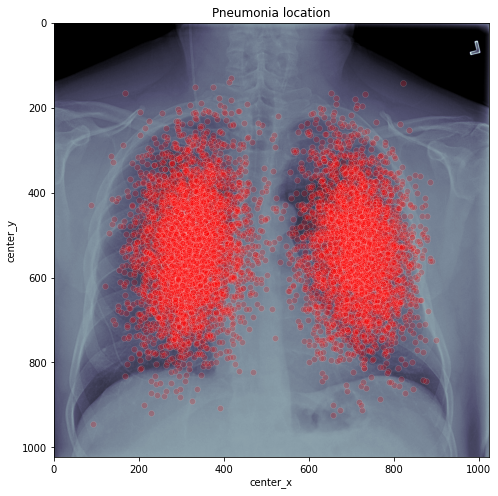

In [ ]:
data_row_img_data = dicom.read_file(final_traindf_annot['path'][24])
image = data_row_img_data.pixel_array
fig, ax = plt.subplots(figsize=(8, 8))
pl=sns.scatterplot('center_x','center_y',data=centers,alpha=0.2,color='red',ax=ax).set(
    title="Pneumonia location")
ax.imshow(image,cmap=plt.cm.bone)
# plt.imshow(image,cmap=plt.cm.bone)


In [ ]:
final_traindf_annot.head(2)

patientId Sex  Age   x   y  width  height  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6   F   51 NaN NaN    NaN     NaN   
1  000924cf-0f8d-42bd-9158-1af53881a557   F   19 NaN NaN    NaN     NaN   

                                                path  Target  
0  /usr/stage_2_train_images/stage_2_train_images...       0  
1  /usr/stage_2_train_images/stage_2_train_images...       0

In [ ]:
traindf.head(2)

patientId   x   y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6 NaN NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd NaN NaN    NaN     NaN       0   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal

In [ ]:
temp_df = pd.merge(traindf,final_traindf_annot[['patientId','Age']],on='patientId',how='left').reset_index()
temp_df.head()

index                             patientId      x      y  width  height  \
0      0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN   
1      1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN   
2      2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN   
3      3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN   
4      4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   

   Target                         class  Age  
0       0  No Lung Opacity / Not Normal   51  
1       0  No Lung Opacity / Not Normal   48  
2       0  No Lung Opacity / Not Normal   19  
3       0                        Normal   28  
4       1                  Lung Opacity   32

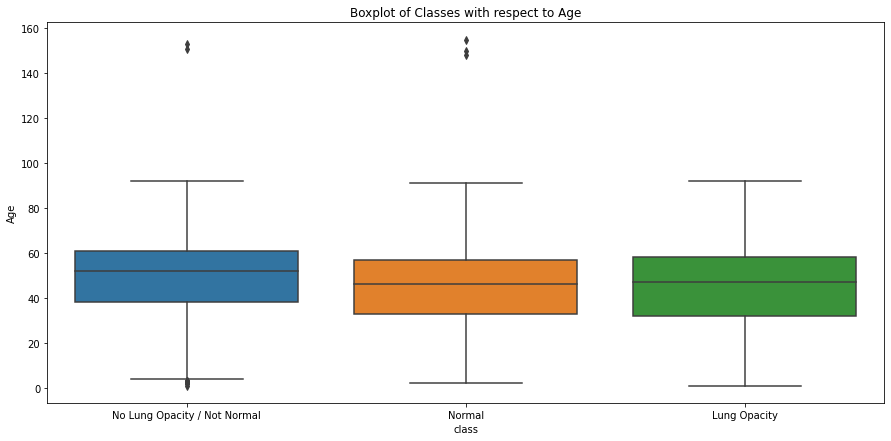

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='class', y=temp_df['Age'], data= temp_df).set_title("Boxplot of Classes with respect to Age")
plt.show();

In [ ]:
bb=bno.value_counts().to_frame()
bb.reset_index()
bb['box'] = bb.index
bb

Target  box
0   20672    0
2    3266    2
1    2614    1
3     119    3
4      13    4

Text(0.5, 1.0, 'Number of Bounding Boxes in Train Set')

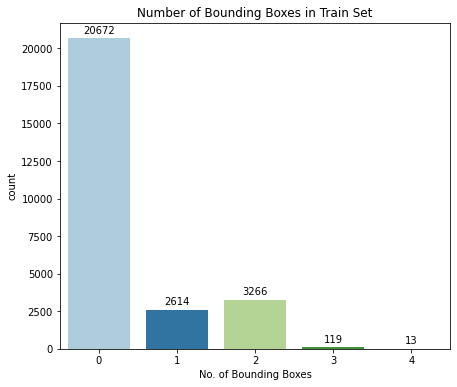

In [ ]:
fig = plt.figure(figsize = (7,6))
ax = sns.barplot(x='box', y='Target', data=bb,palette="Paired")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.set(xlabel='No. of Bounding Boxes', ylabel='count')
plt.title("Number of Bounding Boxes in Train Set")

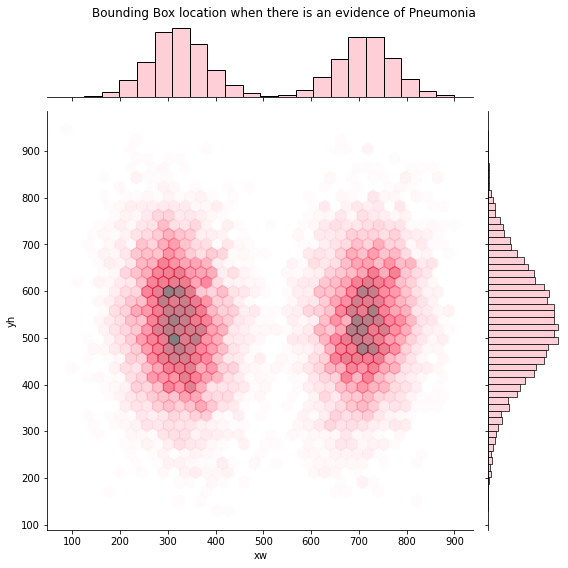

In [ ]:
bboxes = final_traindf_annot[final_traindf_annot['Target'] == 1]
bboxes['xw'] = bboxes['x'] + bboxes['width']/2
bboxes['yh'] = bboxes['y'] + bboxes['height']/2

g = sns.jointplot(x = bboxes['xw'], y = bboxes['yh'], data = bboxes,
                  kind = 'hex', alpha = 0.5, size = 8,color='pink')
plt.suptitle('Bounding Box location when there is an evidence of Pneumonia')
plt.tight_layout()
plt.subplots_adjust(top = 0.95)

In [ ]:
final_traindf_temp = final_traindf_annot.reset_index()
final_traindf_temp.head()

index                             patientId Sex  Age      x      y  width  \
0      0  0004cfab-14fd-4e49-80ba-63a80b6bddd6   F   51    NaN    NaN    NaN   
1      1  000924cf-0f8d-42bd-9158-1af53881a557   F   19    NaN    NaN    NaN   
2      2  000db696-cf54-4385-b10b-6b16fbb3f985   F   25  316.0  318.0  170.0   
3      3  000db696-cf54-4385-b10b-6b16fbb3f985   F   25  660.0  375.0  146.0   
4      4  000fe35a-2649-43d4-b027-e67796d412e0   M   40  570.0  282.0  269.0   

   height                                               path  Target  
0     NaN  /usr/stage_2_train_images/stage_2_train_images...       0  
1     NaN  /usr/stage_2_train_images/stage_2_train_images...       0  
2   478.0  /usr/stage_2_train_images/stage_2_train_images...       1  
3   402.0  /usr/stage_2_train_images/stage_2_train_images...       1  
4   409.0  /usr/stage_2_train_images/stage_2_train_images...       1

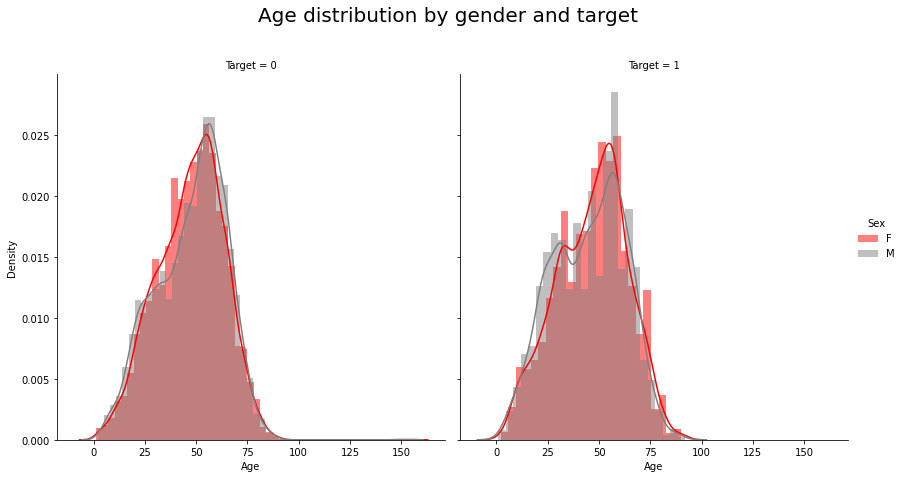

In [ ]:
g = sns.FacetGrid(col='Target', hue='Sex', 
                  data=final_traindf_temp.drop_duplicates(subset=['patientId']), 
                  height=6, palette=dict(F="red", M="grey"))
_ = g.map(sns.distplot, 'Age', hist_kws={'alpha': 0.5}).add_legend()
_ = g.fig.suptitle("Age distribution by gender and target", y=1.1, fontsize=20)

In [ ]:
custom_array = np.linspace(0, 100, 11)
final_traindf_annot['PatientAgeBins'] = pd.cut(final_traindf_annot['Age'], custom_array)
final_traindf_annot['PatientAgeBins'].value_counts()

(50.0, 60.0]     7446
(40.0, 50.0]     5671
(60.0, 70.0]     4730
(30.0, 40.0]     4551
(20.0, 30.0]     3704
(10.0, 20.0]     1688
(70.0, 80.0]     1637
(0.0, 10.0]       515
(80.0, 90.0]      275
(90.0, 100.0]       5
Name: PatientAgeBins, dtype: int64

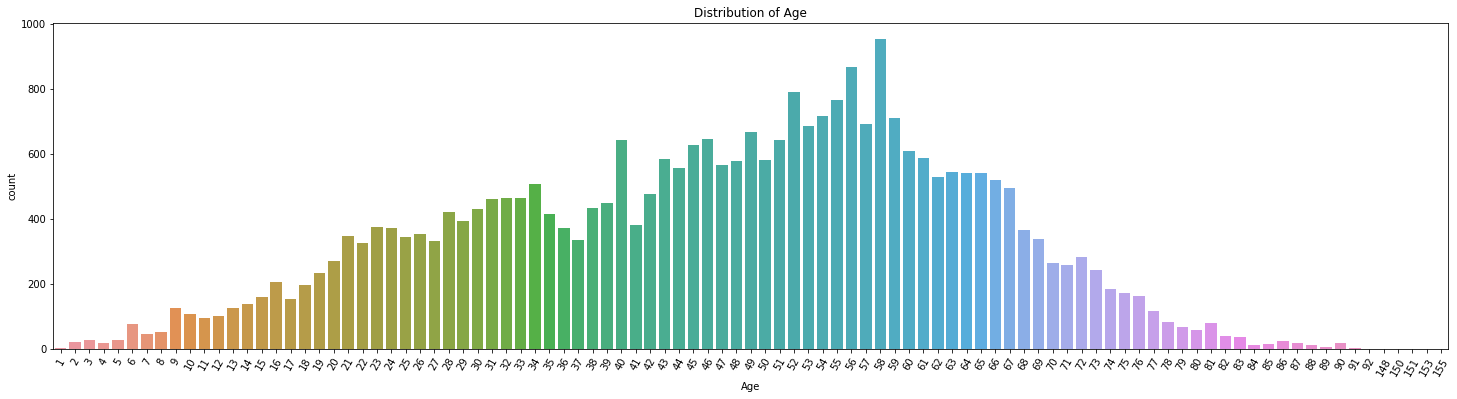

In [ ]:
fig = plt.figure(figsize = (25,6))
sns.countplot(x='Age',data=final_traindf_annot).set_title("Distribution of Age")
plt.xticks(rotation=60);

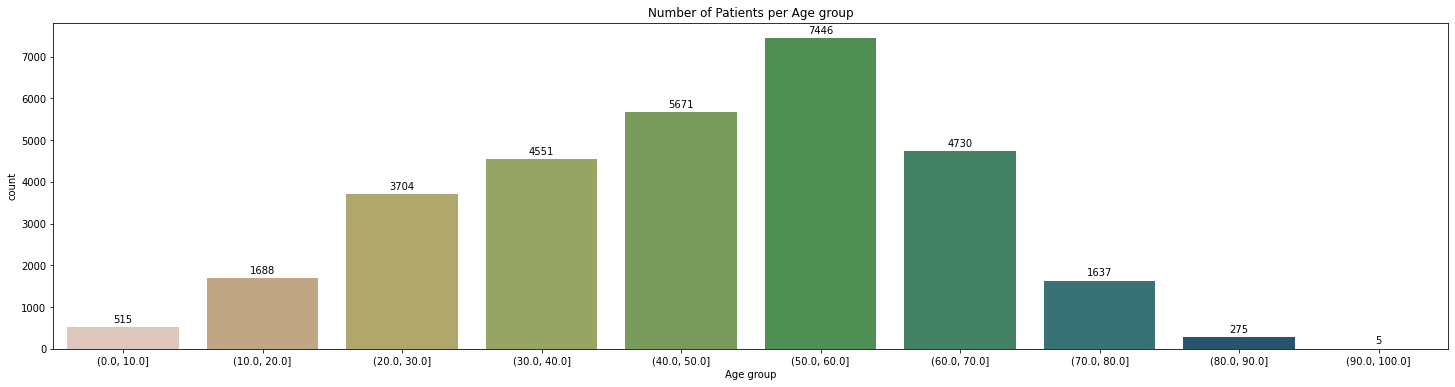

In [ ]:
fig = plt.figure(figsize = (25,6))
ax=sns.countplot(x='PatientAgeBins',data=final_traindf_annot,palette='gist_earth_r')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.set(xlabel='Age group', ylabel='count')
plt.title("Number of Patients per Age group");

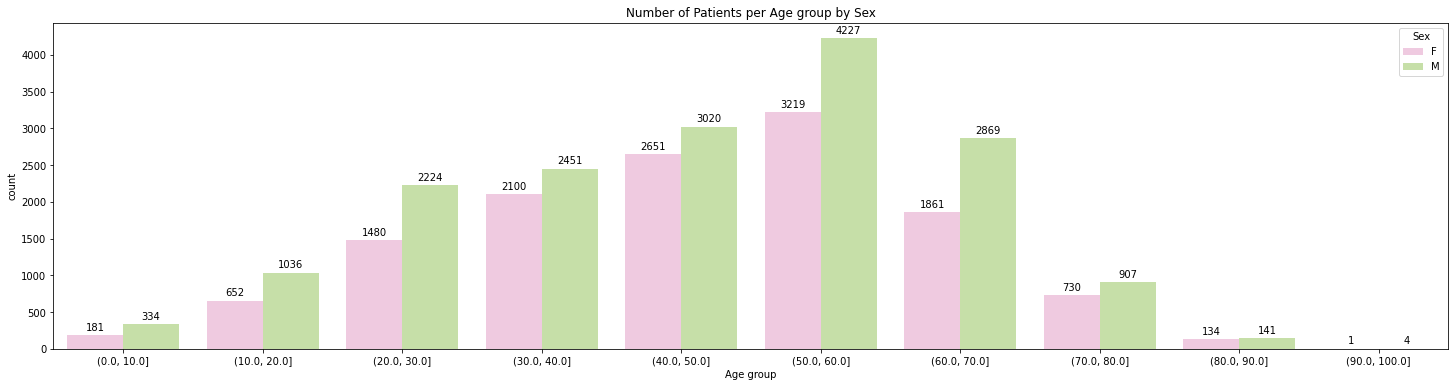

In [ ]:
fig = plt.figure(figsize = (25,6))
ax=sns.countplot(x='PatientAgeBins',data=final_traindf_annot,hue='Sex',palette='PiYG')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.set(xlabel='Age group', ylabel='count')
plt.title("Number of Patients per Age group by Sex");

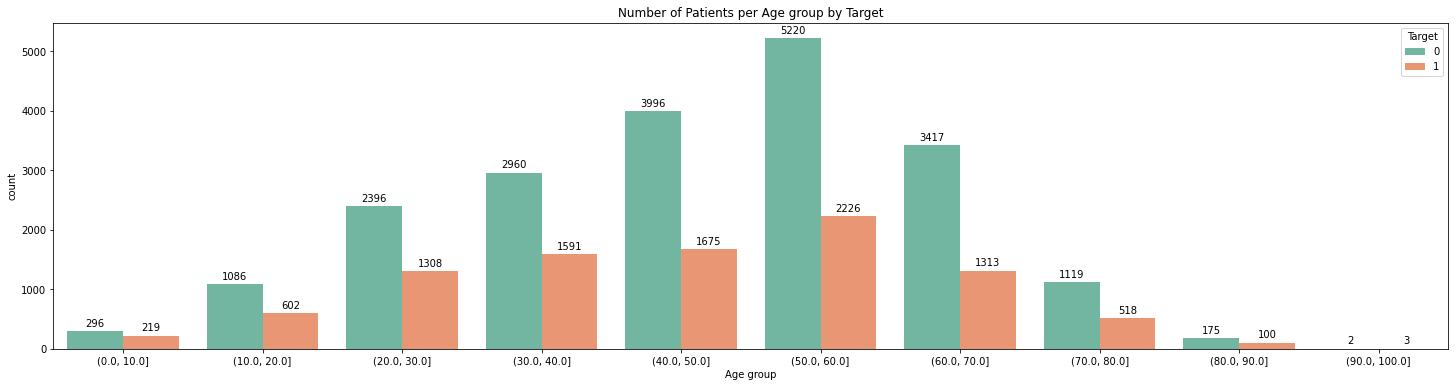

In [ ]:
fig = plt.figure(figsize = (25,6))
ax=sns.countplot(x='PatientAgeBins',data=final_traindf_annot,hue='Target',palette = "Set2")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height(),), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.set(xlabel='Age group', ylabel='count')
plt.title("Number of Patients per Age group by Target");

---
## Step 5: Display images with bounding box

In [ ]:
final_traindf_annot = final_traindf_annot.reset_index()

In [ ]:
final_traindf_annot.columns

Index(['index', 'patientId', 'Sex', 'Age', 'x', 'y', 'width', 'height', 'path',
       'Target', 'PatientAgeBins'],
      dtype='object')

In [ ]:
def show_dicom_images(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        data_row_img_data = dicom.read_file(data_row['path'])
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        ax[i//3, i%3].imshow(data_row_img_data.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\n Age: {} Sex: {} Target: {}\n\nWindow: {}:{}:{}:{}'.format(
                data_row['patientId'],
                age, sex, data_row['Target'],
                data_row['x'],data_row['y'],data_row['width'],data_row['height']))
    plt.show()

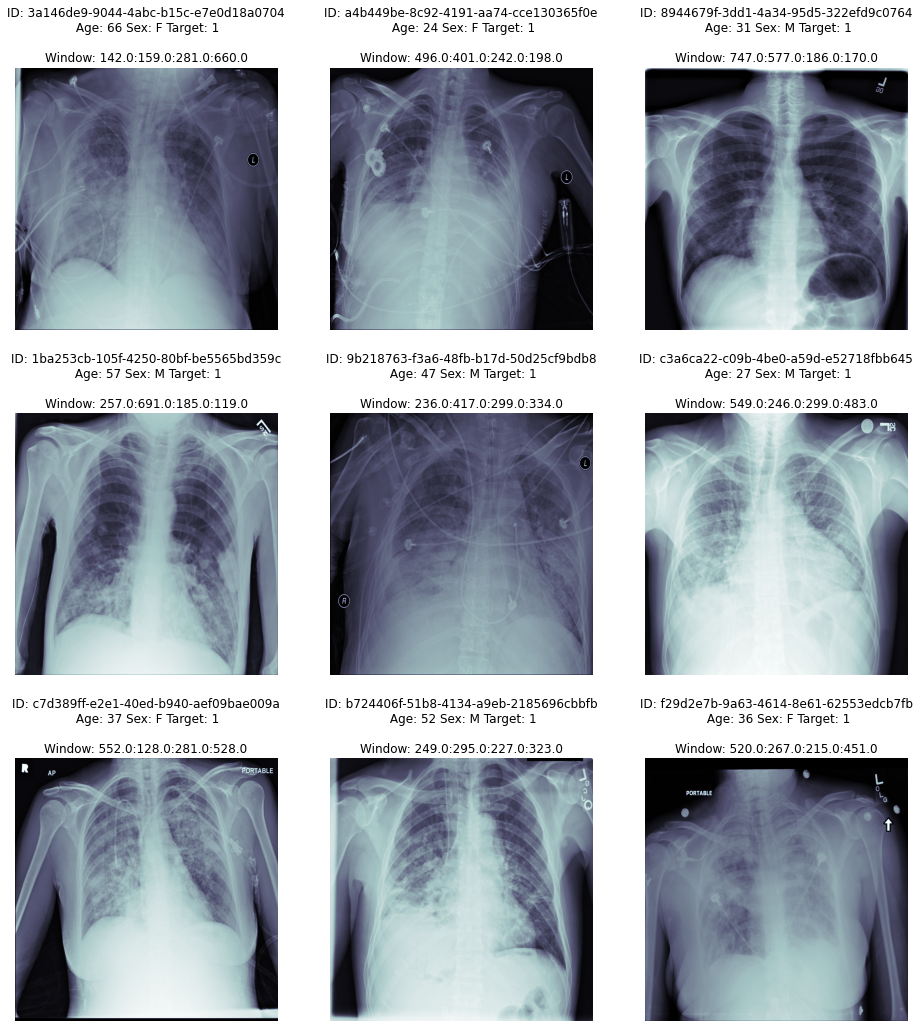

In [ ]:
show_dicom_images(final_traindf_annot[final_traindf_annot['Target']==1].sample(9))

In [ ]:
from matplotlib.patches import Rectangle

In [ ]:
def show_dicom_images_BB(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        data_row_img_data = dicom.read_file(data_row['path'])
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        ax[i//3, i%3].imshow(data_row_img_data.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\n Age: {} Sex: {} Target: {}\n\nWindow: {}:{}:{}:{}'.format(
                data_row['patientId'],
                age, sex, data_row['Target'],
                data_row['x'],data_row['y'],data_row['width'],data_row['height']))
        rows = final_traindf_annot[final_traindf_annot['patientId']==data_row['patientId']]
        box_data = list(rows.T.to_dict().values())
        for j, row in enumerate(box_data):
            ax[i//3, i%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                        width=row['width'],height=row['height'], 
                       linewidth=2, edgecolor='r', facecolor='none'))
    plt.show()
    

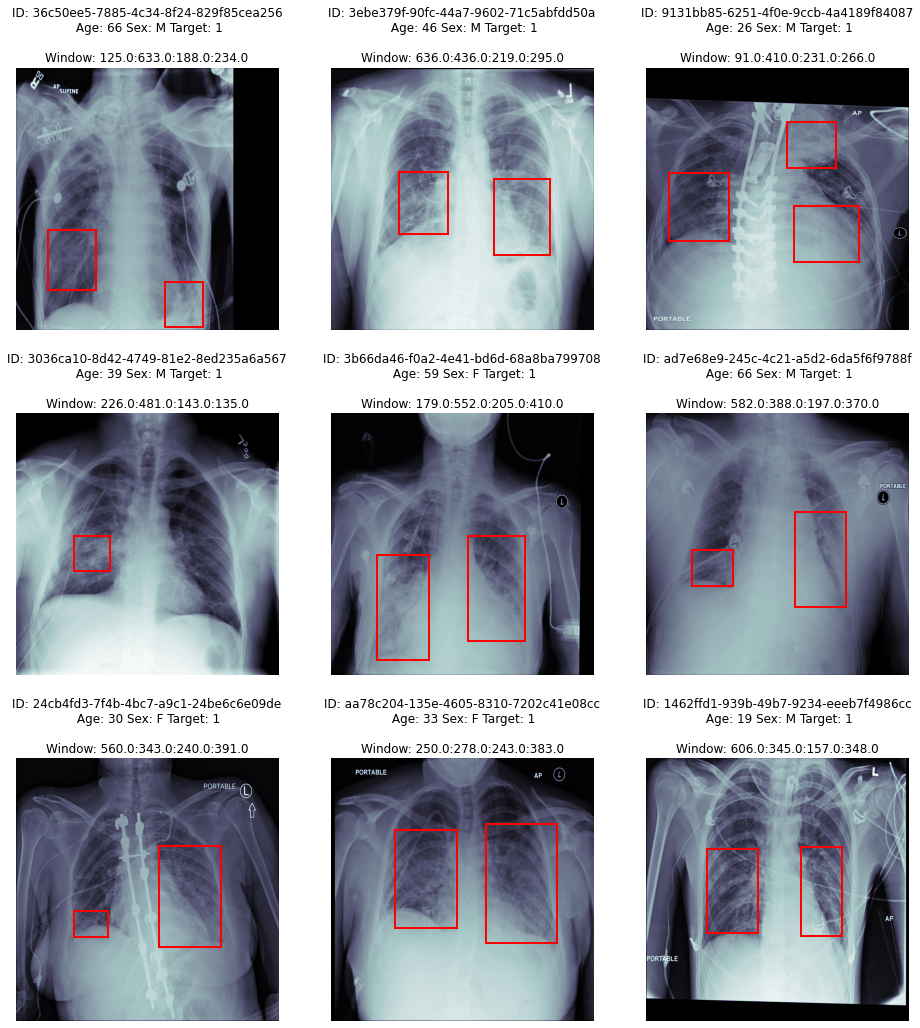

In [ ]:
show_dicom_images_BB(final_traindf_annot[final_traindf_annot['Target']==1].sample(9))

In [ ]:
box_count_1 = final_traindf_annot.groupby('patientId').size().reset_index(name='no_BB') #no_BB : number of bounding boxes

In [ ]:
#Getting patients with 4 bounding boxes
patientIDs_4BB = box_count_1[box_count_1['no_BB']==4]['patientId'].tolist()

In [ ]:
patientIDs_4BB

['0ab261f9-4eb5-42ab-a9a5-e918904d6356',
 '0d5bc737-03de-4bb8-98a1-45b7180c3e0f',
 '0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d',
 '1bf08f3b-a273-4f51-bafa-b55ada2c23b5',
 '1c44e0a4-4612-438f-9a83-8d5bf919cb67',
 '31764d54-ea3b-434f-bae2-8c579ed13799',
 '3239951b-6211-4290-b237-3d9ad17176db',
 '32408669-c137-4e8d-bd62-fe8345b40e73',
 '349f10b4-dc3e-4f3f-b2e4-a5b81448ce87',
 '76f71a93-8105-4c79-a010-0cfa86f0061a',
 '7d674c82-5501-4730-92c5-d241fd6911e7',
 '8dc8e54b-5b05-4dac-80b9-fa48878621e2',
 'ee820aa5-4804-4984-97b3-f0a71d69702f']

In [ ]:
df1 = final_traindf_annot[final_traindf_annot['patientId'].isin(patientIDs_4BB)]

In [ ]:
df1

index                             patientId Sex  Age      x      y  \
1004    1004  0ab261f9-4eb5-42ab-a9a5-e918904d6356   F   45  613.0  352.0   
1005    1005  0ab261f9-4eb5-42ab-a9a5-e918904d6356   F   45  266.0  644.0   
1006    1006  0ab261f9-4eb5-42ab-a9a5-e918904d6356   F   45  545.0  452.0   
1007    1007  0ab261f9-4eb5-42ab-a9a5-e918904d6356   F   45  722.0  558.0   
1325    1325  0d5bc737-03de-4bb8-98a1-45b7180c3e0f   M   71  342.0  157.0   
1326    1326  0d5bc737-03de-4bb8-98a1-45b7180c3e0f   M   71  633.0  128.0   
1327    1327  0d5bc737-03de-4bb8-98a1-45b7180c3e0f   M   71  655.0  478.0   
1328    1328  0d5bc737-03de-4bb8-98a1-45b7180c3e0f   M   71  214.0  374.0   
1357    1357  0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d   F   62  654.0  444.0   
1358    1358  0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d   F   62  531.0  206.0   
1359    1359  0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d   F   62  686.0  545.0   
1360    1360  0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d   F   62  213.0  386.0   
2448    2448  1bf08f3b-a273-4f51-bafa-b55ada2c23b5   F   21  322.0  327.0   
2449    2449  1bf08f3b-a273-4f51-bafa-b55ada2c23b5   F   21  340.0  564.0   
2450    2450  1bf08f3b-a273-4f51-bafa-b55ada2c23b5   F   21  631.0  339.0   
2451    2451  1bf08f3b-a273-4f51-bafa-b55ada2c23b5   F   21  631.0  474.0   
2467    2467  1c44e0a4-4612-438f-9a83-8d5bf919cb67   M   58  658.0  346.0   
2468    2468  1c44e0a4-4612-438f-9a83-8d5bf919cb67   M   58  258.0  786.0   
2469    2469  1c44e0a4-4612-438f-9a83-8d5bf919cb67   M   58  315.0  363.0   
2470    2470  1c44e0a4-4612-438f-9a83-8d5bf919cb67   M   58  667.0  683.0   
3520    3520  31764d54-ea3b-434f-bae2-8c579ed13799   F   49  258.0  521.0   
3521    3521  31764d54-ea3b-434f-bae2-8c579ed13799   F   49  293.0  311.0   
3522    3522  31764d54-ea3b-434f-bae2-8c579ed13799   F   49  713.0  593.0   
3523    3523  31764d54-ea3b-434f-bae2-8c579ed13799   F   49  649.0  319.0   
3646    3646  3239951b-6211-4290-b237-3d9ad17176db   F   35  511.0  249.0   
3647    3647  3239951b-6211-4290-b237-3d9ad17176db   F   35  558.0  649.0   
3648    3648  3239951b-6211-4290-b237-3d9ad17176db   F   35  152.0  661.0   
3649    3649  3239951b-6211-4290-b237-3d9ad17176db   F   35  198.0  370.0   
3654    3654  32408669-c137-4e8d-bd62-fe8345b40e73   M   46  273.0  856.0   
3655    3655  32408669-c137-4e8d-bd62-fe8345b40e73   M   46  702.0  801.0   
3656    3656  32408669-c137-4e8d-bd62-fe8345b40e73   M   46  300.0  367.0   
3657    3657  32408669-c137-4e8d-bd62-fe8345b40e73   M   46  706.0  360.0   
4019    4019  349f10b4-dc3e-4f3f-b2e4-a5b81448ce87   M   56  365.0  192.0   
4020    4020  349f10b4-dc3e-4f3f-b2e4-a5b81448ce87   M   56  614.0  264.0   
4021    4021  349f10b4-dc3e-4f3f-b2e4-a5b81448ce87   M   56  594.0  465.0   
4022    4022  349f10b4-dc3e-4f3f-b2e4-a5b81448ce87   M   56  204.0  385.0   
12599  12599  76f71a93-8105-4c79-a010-0cfa86f0061a   M   43  619.0  488.0   
12600  12600  76f71a93-8105-4c79-a010-0cfa86f0061a   M   43  673.0  303.0   
12601  12601  76f71a93-8105-4c79-a010-0cfa86f0061a   M   43  314.0  461.0   
12602  12602  76f71a93-8105-4c79-a010-0cfa86f0061a   M   43  348.0  303.0   
13410  13410  7d674c82-5501-4730-92c5-d241fd6911e7   F   52  358.0  320.0   
13411  13411  7d674c82-5501-4730-92c5-d241fd6911e7   F   52  283.0  528.0   
13412  13412  7d674c82-5501-4730-92c5-d241fd6911e7   F   52  718.0  573.0   
13413  13413  7d674c82-5501-4730-92c5-d241fd6911e7   F   52  658.0  315.0   
15467  15467  8dc8e54b-5b05-4dac-80b9-fa48878621e2   M   76  281.0  163.0   
15468  15468  8dc8e54b-5b05-4dac-80b9-fa48878621e2   M   76  602.0  189.0   
15469  15469  8dc8e54b-5b05-4dac-80b9-fa48878621e2   M   76  688.0  548.0   
15470  15470  8dc8e54b-5b05-4dac-80b9-fa48878621e2   M   76  199.0  492.0   
28020  28020  ee820aa5-4804-4984-97b3-f0a71d69702f   M   24  605.0  228.0   
28021  28021  ee820aa5-4804-4984-97b3-f0a71d69702f   M   24  634.0  569.0   
28022  28022  ee820aa5-4804-4984-97b3-f0a71d69702f   M   24  211.0  238.0   
280

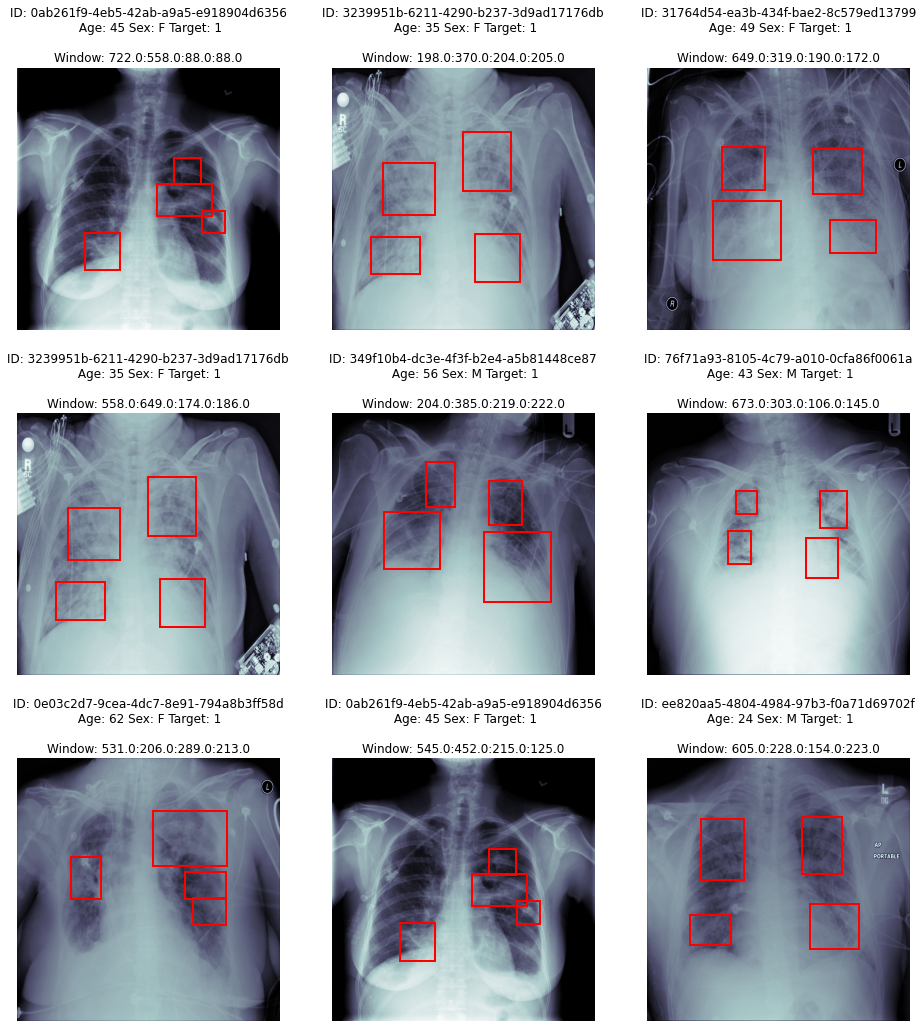

X-Ray images of Patients with 4 Bounding Boxes


In [ ]:
show_dicom_images_BB(df1[df1['Target']==1].sample(9))
print('X-Ray images of Patients with 4 Bounding Boxes')

In [ ]:
df_final_train = final_traindf_annot.copy()

In [ ]:
df_final_train = df_final_train[['patientId','Target']]

In [ ]:
def read_dicom_to_list(data):
    img_data = list(data.T.to_dict().values())
    img_train_list = []
    for i,data_row in enumerate(img_data):
        data_row_img_data = dicom.read_file(data_row['path'])
        image = data_row_img_data.pixel_array
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)        
        rows = final_traindf_annot[final_traindf_annot['patientId']==data_row['patientId']]
        box_data = list(rows.T.to_dict().values())
        for j, row in enumerate(box_data):
          x, y, width, height, target = row['x'], row['y'], row['width'], row['height'], row['Target']
          # print('x:',x,'y:',y, 'width:',width, 'height:', height)
          if target == 1:
            img1 = cv2.rectangle(image,(int(x),int(y)),(int(x+width),int(y+height)),(255,0,0),2)
          else:
            img1 = image
          img1 = cv2.resize(img1, (128, 128))
        img_train_list.append(img1)
    
    return img_train_list

We will be creating models with 2 datasets.

1.   will take sample of size 10000 from train
2.   will take a dataset that contains equal samples size of 3500 from Target 1 and Target 0 each respectively

In [ ]:
#Creating Train dataset with sample size 10000
final_traindf_sample = final_traindf_annot.sample(10000)

In [ ]:
final_traindf_sample['Target'].value_counts()

0    6761
1    3239
Name: Target, dtype: int64

In [ ]:
out = read_dicom_to_list(final_traindf_sample)

In [ ]:
final_traindf_sample['image'] = out

In [ ]:
final_traindf_sample.head()

index                             patientId Sex  Age      x      y  \
12321  12321  74a08fcb-fc92-4b2f-9301-3602dbaf0a41   M   33  196.0  275.0   
10372  10372  659ecb83-6644-41c9-847f-20edb3d63a07   F   57    NaN    NaN   
25506  25506  d9fc48eb-9f51-4a78-b132-3532f4aa05f7   M   49  166.0  630.0   
24012  24012  cd78f228-1c12-4421-adb5-f739f0ce306e   M   71  178.0  229.0   
9704    9704  604a0eca-1494-47b8-a49b-713d24d070f9   M   69  682.0  371.0   

       width  height                                               path  \
12321  196.0   235.0  /usr/stage_2_train_images/stage_2_train_images...   
10372    NaN     NaN  /usr/stage_2_train_images/stage_2_train_images...   
25506  218.0   190.0  /usr/stage_2_train_images/stage_2_train_images...   
24012  260.0   347.0  /usr/stage_2_train_images/stage_2_train_images...   
9704   199.0   221.0  /usr/stage_2_train_images/stage_2_train_images...   

       Target PatientAgeBins  \
12321       1   (30.0, 40.0]   
10372       0   (50.0, 60.0]   
25506       1   (40.0, 50.0]   
24012       1   (70.0, 80.0]   
9704        1   (60.0, 70.0]   

                                                   image  
12321  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...  
10372  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
25506  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
24012  [[[1, 1, 1], [1, 1, 1], [3, 3, 3], [5, 5, 5], ...  
9704   [[[10, 10, 10], [0, 0, 0], [0, 0, 0], [0, 0, 0...

In [ ]:
final_traindf_sample.shape

(10000, 12)

In [ ]:
# all_variables = dir()
# all_variables

In [ ]:
# del df1,final_traindf, out,temp_df

---
## Step 6: Design, train and test basic CNN models for classification.

Create new CNN architecture to train the model.
1. Input shape: 256 x 256 , 3 channel

2. Layer 1: Convolution
    - Number of Filters: 32
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: 0
    - Stride: 1
    
    
3. Layer 2: Convolution
    - Number of Filters: 64
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: 0
    - Stride: 1
    
    
4. Layer 3: Neural network
    - Dense layer units: 64 
    - Softmax output units: 12

First Model : with sample datasets final_traindf_sample and final_testdf_sample

In [ ]:
final_traindf_sample.columns

Index(['index', 'patientId', 'Sex', 'Age', 'x', 'y', 'width', 'height', 'path',
       'Target', 'PatientAgeBins', 'image'],
      dtype='object')

In [ ]:
final_traindf_annot = final_traindf_annot.reset_index()

In [ ]:
final_traindf_annot.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'path', 'Target'], dtype='object')

In [ ]:
df_final_train = final_traindf_annot.copy()

In [ ]:
df_final_train = df_final_train[['patientId','Target']]

In [ ]:
def read_dicom_to_list(data):
    img_data = list(data.T.to_dict().values())
    img_train_list = []
    for i,data_row in enumerate(img_data):
        data_row_img_data = dicom.read_file(data_row['path'])
        image = data_row_img_data.pixel_array
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)        
        img1 = cv2.resize(image, (256, 256))
        img_train_list.append(img1)   
    return img_train_list

We will be creating models with 2 datasets.

1.   will take sample of size 10000 from train
2.   will take a dataset that contains equal samples size of 3500 from Target 1 and Target 0 each respectively

In [ ]:
#Creating Train dataset with sample size 10000
final_traindf_sample = final_traindf_annot.sample(10000)

In [ ]:
final_traindf_sample['Target'].value_counts()

0    6930
1    3070
Name: Target, dtype: int64

In [ ]:
out = read_dicom_to_list(final_traindf_sample)

In [ ]:
final_traindf_sample['image'] = out

In [ ]:
final_traindf_sample.head()

patientId   x   y  width  height  \
27548  eaeb935a-7294-4dd3-8bf5-73ba781d28af NaN NaN    NaN     NaN   
24878  d4ce29be-5881-484c-8b05-9f7887e52eb2 NaN NaN    NaN     NaN   
4909   3a5db4e4-7069-4ae8-8d02-c9027c5833c4 NaN NaN    NaN     NaN   
1143   0bb7b8e1-ffb4-4c6f-81aa-639e1d138a7f NaN NaN    NaN     NaN   
20576  b4611ca1-f0da-4bca-a291-65fcf9d0a86c NaN NaN    NaN     NaN   

                                                    path  Target  \
27548  /usr/stage_2_train_images/stage_2_train_images...       0   
24878  /usr/stage_2_train_images/stage_2_train_images...       0   
4909   /usr/stage_2_train_images/stage_2_train_images...       0   
1143   /usr/stage_2_train_images/stage_2_train_images...       0   
20576  /usr/stage_2_train_images/stage_2_train_images...       0   

                                                   image  
27548  [[[146, 146, 146], [94, 94, 94], [44, 44, 44],...  
24878  [[[31, 31, 31], [31, 31, 31], [31, 31, 31], [3...  
4909   [[[0, 0, 0], [9, 9, 9], [9, 9, 9], [6, 6, 6], ...  
1143   [[[224, 224, 224], [123, 123, 123], [72, 72, 7...  
20576  [[[0, 0, 0], [84, 84, 84], [57, 57, 57], [41, ...

In [ ]:
final_traindf_sample.shape

(10000, 8)

In [ ]:
# all_variables = dir()
# all_variables

In [ ]:
# del df1,final_traindf, out,temp_df

First Model : with sample datasets final_traindf_sample and final_testdf_sample

In [ ]:
final_traindf_sample.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'path', 'Target', 'image'], dtype='object')

In [ ]:
X = final_traindf_sample['image']
y = final_traindf_sample['Target']

In [ ]:
#scaling train dataset
X_temp = []
for i in X:
  temp1 = (i/255.).astype(np.float32)
  X_temp.append(temp1)

In [ ]:
X=np.asarray(X_temp)

In [ ]:
# we can keep train dataset to be 80% below ( common among all )
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7,stratify=y)
X_valid, X_test, y_valid, y_test= train_test_split(X_rem,y_rem, test_size=0.5,stratify=y_rem)

In [ ]:
# del df_final_train, final_traindf, X_rem, y_rem, X, y, final_traindf_sample, out

In [ ]:
# dir()

In [ ]:
# model architecture building
model1 = Sequential()

model1.add(BatchNormalization(input_shape = (256, 256, 3)))

model1.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu')) 
model1.add(MaxPooling2D(pool_size = 2))

model1.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model1.add(MaxPooling2D(pool_size = 2))

model1.add(Flatten()) 

# fully connected layer
model1.add(Dense(units = 64,activation = 'relu'))
model1.add(Dropout(0.2))

# Classification layer
model1.add(Dense(units = 1, activation = 'sigmoid')) 

In [ ]:
optimizer = Adam(lr=0.001)
model1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 256, 256, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                      

In [ ]:
X_test.shape

(1500, 256, 256, 3)

In [ ]:
X_train.shape

(7000, 256, 256, 3)

### Train the model on train data and validate on test data.

In [ ]:
history1=model1.fit(X_train,y_train, epochs = 10,initial_epoch=0, verbose = 2,validation_data=(X_valid,y_valid))

Epoch 1/10
219/219 - 146s - loss: 0.6952 - accuracy: 0.7189 - val_loss: 0.5357 - val_accuracy: 0.7460 - 146s/epoch - 666ms/step
Epoch 2/10
219/219 - 143s - loss: 0.4948 - accuracy: 0.7619 - val_loss: 0.4915 - val_accuracy: 0.7733 - 143s/epoch - 654ms/step
Epoch 3/10
219/219 - 142s - loss: 0.4553 - accuracy: 0.7871 - val_loss: 0.4752 - val_accuracy: 0.7820 - 142s/epoch - 648ms/step
Epoch 4/10
219/219 - 143s - loss: 0.3990 - accuracy: 0.8240 - val_loss: 0.4810 - val_accuracy: 0.7760 - 143s/epoch - 651ms/step
Epoch 5/10
219/219 - 142s - loss: 0.3119 - accuracy: 0.8673 - val_loss: 0.5098 - val_accuracy: 0.7613 - 142s/epoch - 647ms/step
Epoch 6/10
219/219 - 143s - loss: 0.2154 - accuracy: 0.9094 - val_loss: 0.6087 - val_accuracy: 0.7693 - 143s/epoch - 651ms/step
Epoch 7/10
219/219 - 143s - loss: 0.1310 - accuracy: 0.9483 - val_loss: 0.7320 - val_accuracy: 0.7600 - 143s/epoch - 651ms/step
Epoch 8/10
219/219 - 143s - loss: 0.0850 - accuracy: 0.9680 - val_loss: 0.9605 - val_accuracy: 0.7713 - 

 Training Loss and Validation Loss

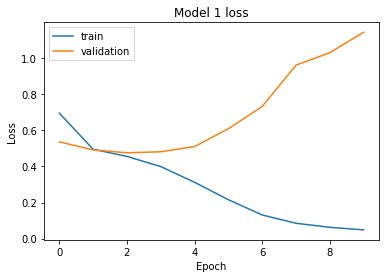

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model 1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Training Accuracy and Validation Accuracy

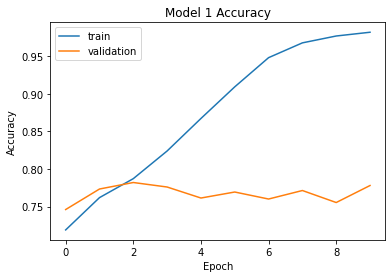

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

A hyper parameter tuning is required to get an industry accepted 70% results.Here the results are little overfit and can be used a better model.

In [ ]:
results = model1.evaluate(X_test, y_test)

47/47 [==============================] - 3s 67ms/step - loss: 1.2310 - accuracy: 0.7773


In [ ]:
y_pred1=model1.predict(X_test)
y_pred1_1=y_pred1.round()

47/47 [==============================] - 3s 66ms/step


In [ ]:
print(y_pred1[0]) # rounding to nearest integer to classify in binary 
y_pred1_1[0]

[1.4365943e-07]


array([0.], dtype=float32)

In [ ]:
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred1_1)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1040
           1       0.65      0.60      0.62       460

    accuracy                           0.78      1500
   macro avg       0.74      0.73      0.73      1500
weighted avg       0.77      0.78      0.78      1500



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1_1)

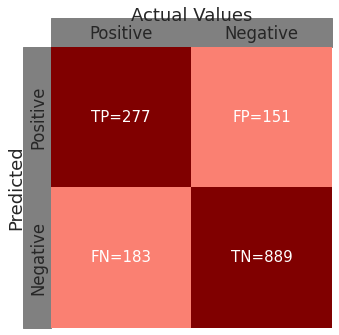

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['salmon', 'maroon'], as_cmap=True),
                 annot=[[f"TP={cm[1][1]:.0f}", f"FP={cm[0][1]:.0f}"], [f"FN={cm[1][0]:.0f}", f"TN={cm[0][0]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 15}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='grey', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='grey', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

In [ ]:
# removing unwanted variables to release memory
# del X_test, X_train, y_test, y_train, X_valid, y_valid
del model1, history1

# Milestone 2

## Step 1: Fine tune the trained basic CNN models for classification.

We have tried with 2 different approaches:
1. Adding Batch Normalization and dropouts
2. Hyper parameter tuning of models using HParams Dashboard

### 1. Adding Batch Normalization and dropouts

In [ ]:
# model architecture building
model2 = Sequential()

model2.add(BatchNormalization(input_shape = (256, 256, 3)))

model2.add(Convolution2D(filters = 128, kernel_size = 3, activation ='relu')) 
model2.add(MaxPooling2D(pool_size = 2))

model2.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))

model2.add(Convolution2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))

model2.add(Flatten()) 

# fully connected layer
model2.add(Dense(units = 64,activation = 'relu'))
model2.add(Dropout(0.2))

# Classification layer
model2.add(Dense(units = 1, activation = 'sigmoid')) 

In [ ]:
optimizer = Adam(lr=0.001)
model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 256, 256, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 128)    0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 127, 127, 64)      73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                      

In [ ]:
history2=model2.fit(X_train,y_train, epochs = 10,initial_epoch=0, verbose = 2,validation_data=(X_valid,y_valid))

Epoch 1/10
219/219 - 393s - loss: 0.5322 - accuracy: 0.7434 - val_loss: 0.5572 - val_accuracy: 0.7533 - 393s/epoch - 2s/step
Epoch 2/10
219/219 - 398s - loss: 0.4880 - accuracy: 0.7649 - val_loss: 0.5357 - val_accuracy: 0.7680 - 398s/epoch - 2s/step
Epoch 3/10
219/219 - 399s - loss: 0.4810 - accuracy: 0.7699 - val_loss: 0.4787 - val_accuracy: 0.7720 - 399s/epoch - 2s/step
Epoch 4/10
219/219 - 398s - loss: 0.4665 - accuracy: 0.7710 - val_loss: 0.4760 - val_accuracy: 0.7633 - 398s/epoch - 2s/step
Epoch 5/10
219/219 - 397s - loss: 0.4490 - accuracy: 0.7874 - val_loss: 0.4917 - val_accuracy: 0.7773 - 397s/epoch - 2s/step
Epoch 6/10
219/219 - 396s - loss: 0.4269 - accuracy: 0.8013 - val_loss: 0.4760 - val_accuracy: 0.7773 - 396s/epoch - 2s/step
Epoch 7/10
219/219 - 396s - loss: 0.4049 - accuracy: 0.8129 - val_loss: 0.4973 - val_accuracy: 0.7920 - 396s/epoch - 2s/step
Epoch 8/10
219/219 - 396s - loss: 0.3687 - accuracy: 0.8319 - val_loss: 0.5714 - val_accuracy: 0.7540 - 396s/epoch - 2s/step


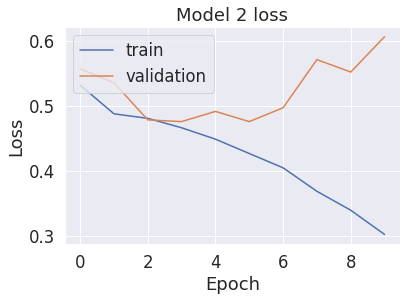

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model 2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

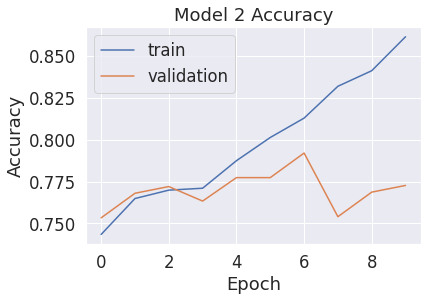

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
results = model2.evaluate(X_test, y_test)

47/47 [==============================] - 10s 204ms/step - loss: 0.6225 - accuracy: 0.7633


In [ ]:
y_pred1=model2.predict(X_test)
y_pred1_1=y_pred1.round()

47/47 [==============================] - 10s 204ms/step


In [ ]:
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred1_1)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1040
           1       0.68      0.44      0.53       460

    accuracy                           0.76      1500
   macro avg       0.73      0.67      0.69      1500
weighted avg       0.75      0.76      0.75      1500



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1_1)

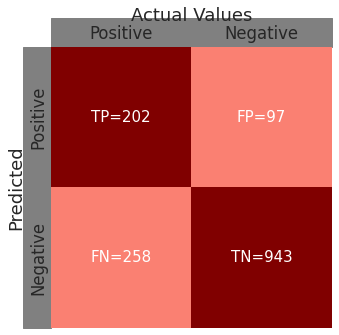

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['salmon', 'maroon'], as_cmap=True),
                 annot=[[f"TP={cm[1][1]:.0f}", f"FP={cm[0][1]:.0f}"], [f"FN={cm[1][0]:.0f}", f"TN={cm[0][0]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 15}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='grey', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='grey', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

In [ ]:
# removing unwanted variables to release memory

# here we can delete X_test, X_valid, X_train 
# - because it's for imbalanced dataset, and in next step we look at balanced dataset

# before we go to balanced datset we can run transfer learning models on imbalanced data

# del X_test, X_train, y_test, y_train, X_valid, y_valid
# del model2, history2

In [ ]:
# dir()

### Train Model2 on Balanced Dataset: with equal sample size 5000 from Target class 0 and class 1

In [ ]:
final_traindf_annot = final_traindf_annot.reset_index()
final_traindf_annot.head(3)

index                             patientId      x      y  width  height  \
0      0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN   
1      1  000924cf-0f8d-42bd-9158-1af53881a557    NaN    NaN    NaN     NaN   
2      2  000db696-cf54-4385-b10b-6b16fbb3f985  316.0  318.0  170.0   478.0   

                                                path  Target  
0  /usr/stage_2_train_images/stage_2_train_images...       0  
1  /usr/stage_2_train_images/stage_2_train_images...       0  
2  /usr/stage_2_train_images/stage_2_train_images...       1

In [ ]:
uniquePatientdf = final_traindf_annot.drop_duplicates(subset='patientId',keep='first', inplace=False)
len(uniquePatientdf)

26684

In [ ]:
#  generate balanced class dataset 
uniquePatientdf_1 = uniquePatientdf[uniquePatientdf['Target'] == 1].head(5000)
uniquePatientdf_0 = uniquePatientdf[uniquePatientdf['Target'] == 0].head(5000)

In [ ]:
uniquePatientdfbal = pd.concat([uniquePatientdf_1, uniquePatientdf_0], axis=0, join='inner')
len(uniquePatientdfbal)

10000

In [ ]:
uniquePatientdfbal.columns

Index(['index', 'patientId', 'x', 'y', 'width', 'height', 'path', 'Target'], dtype='object')

In [ ]:
out2 = read_dicom_to_list(uniquePatientdfbal)
uniquePatientdfbal['image'] = out2

In [ ]:
uniquePatientdfbal.columns

Index(['index', 'patientId', 'x', 'y', 'width', 'height', 'path', 'Target',
       'image'],
      dtype='object')

In [ ]:
uniquePatientdfbal['image'][0].shape

(256, 256, 3)

In [ ]:
uniquePatientdfbal = uniquePatientdfbal[['patientId', 'image', 'Target']]

In [ ]:
uniquePatientdfbal.head()

patientId  \
2   000db696-cf54-4385-b10b-6b16fbb3f985   
4   000fe35a-2649-43d4-b027-e67796d412e0   
6   001031d9-f904-4a23-b3e5-2c088acd19c6   
9   001916b8-3d30-4935-a5d1-8eaddb1646cd   
10  0022073f-cec8-42ec-ab5f-bc2314649235   

                                                image  Target  
2   [[[3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], ...       1  
4   [[[17, 17, 17], [18, 18, 18], [18, 18, 18], [1...       1  
6   [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...       1  
9   [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...       1  
10  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...       1

In [ ]:
uniquePatientdfbal['Target'].value_counts()

1    5000
0    5000
Name: Target, dtype: int64

In [ ]:
X_unique_tr = uniquePatientdfbal['image']
y_unique_ts = uniquePatientdfbal['Target']

In [ ]:
del out2, uniquePatientdfbal

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X_unique_tr,y_unique_ts, train_size=0.8, stratify=y_unique_ts)
X_valid, X_test, y_valid, y_test= train_test_split(X_rem,y_rem, test_size=0.5,stratify=y_rem)

In [ ]:
del X_unique_tr, X_rem

In [ ]:
def scale_X_images(X_train):
  X_unique_temp = []
  for i in X_train:
    temp1 = (i/255.).astype(np.float32)
    X_unique_temp.append(temp1)
  X_unique=np.asarray(X_unique_temp)
  return X_unique

In [ ]:
X_train = scale_X_images(X_train)

In [ ]:
X_valid = scale_X_images(X_valid)

In [ ]:
X_test = scale_X_images(X_test)

In [ ]:
# del X_unique_temp, X_unique

In [ ]:
X_train[0].shape

(256, 256, 3)

In [ ]:
# model architecture building
model2 = Sequential()

model2.add(BatchNormalization(input_shape = (256, 256, 3)))

model2.add(Convolution2D(filters = 128, kernel_size = 3, activation ='relu')) 
model2.add(MaxPooling2D(pool_size = 2))

model2.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))

model2.add(Convolution2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))

model2.add(Flatten()) 

# fully connected layer
model2.add(Dense(units = 64,activation = 'relu'))
model2.add(Dropout(0.2))

# Classification layer
model2.add(Dense(units = 1, activation = 'sigmoid')) 

In [ ]:
optimizer = Adam(lr=0.001)
model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 256, 256, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 127, 127, 128)    0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 127, 127, 64)      73792     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                      

In [ ]:
history3=model2.fit(X_train,y_train, epochs = 10, initial_epoch=0, verbose = 2,validation_data=(X_valid,y_valid))

Epoch 1/10
250/250 - 432s - loss: 0.5897 - accuracy: 0.7007 - val_loss: 0.5970 - val_accuracy: 0.7000 - 432s/epoch - 2s/step
Epoch 2/10
250/250 - 430s - loss: 0.5513 - accuracy: 0.7385 - val_loss: 0.5645 - val_accuracy: 0.7240 - 430s/epoch - 2s/step
Epoch 3/10
250/250 - 432s - loss: 0.5344 - accuracy: 0.7481 - val_loss: 0.5765 - val_accuracy: 0.6960 - 432s/epoch - 2s/step
Epoch 4/10
250/250 - 430s - loss: 0.5147 - accuracy: 0.7545 - val_loss: 0.5577 - val_accuracy: 0.7310 - 430s/epoch - 2s/step
Epoch 5/10
250/250 - 429s - loss: 0.4876 - accuracy: 0.7715 - val_loss: 0.5967 - val_accuracy: 0.7250 - 429s/epoch - 2s/step
Epoch 6/10
250/250 - 429s - loss: 0.4584 - accuracy: 0.7836 - val_loss: 0.6183 - val_accuracy: 0.7150 - 429s/epoch - 2s/step
Epoch 7/10
250/250 - 433s - loss: 0.4216 - accuracy: 0.8006 - val_loss: 0.5709 - val_accuracy: 0.7280 - 433s/epoch - 2s/step
Epoch 8/10
250/250 - 435s - loss: 0.3882 - accuracy: 0.8250 - val_loss: 0.6243 - val_accuracy: 0.7160 - 435s/epoch - 2s/step


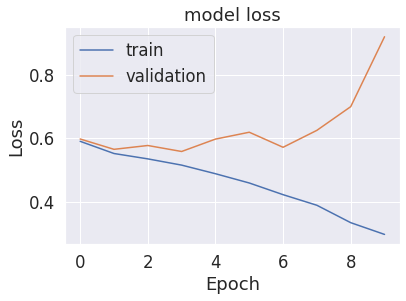

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

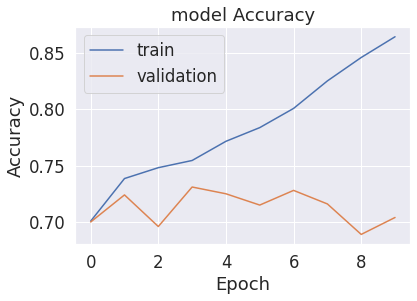

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
results_unique = model2.evaluate(X_test, y_test)

32/32 [==============================] - 6s 173ms/step - loss: 0.9380 - accuracy: 0.6870


In [ ]:
y_test.shape

(1000,)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred_unique=model2.predict(X_test)
y_pred1_2=y_pred_unique.round()
cr_unique=metrics.classification_report(y_test,y_pred1_2)
print(cr_unique)

32/32 [==============================] - 6s 171ms/step
              precision    recall  f1-score   support

           0       0.66      0.76      0.71       500
           1       0.72      0.62      0.66       500

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



In [ ]:
cm_unique = confusion_matrix(y_test,y_pred1_2)

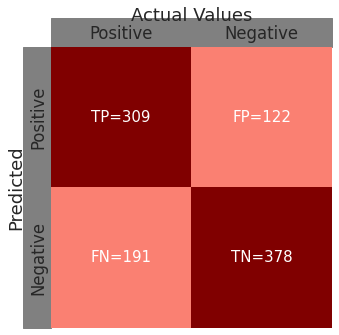

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['salmon', 'maroon'], as_cmap=True),
                 annot=[[f"TP={cm_unique[1][1]:.0f}", f"FP={cm_unique[0][1]:.0f}"], [f"FN={cm_unique[1][0]:.0f}", f"TN={cm_unique[0][0]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 15}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='grey', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='grey', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

### 2. Hyper parameter tuning of models using HParams Dashboard


CNN Hypertuning with HParams Dashboard

In [ ]:
import tensorflow as tf
import kerastuner as kt

In [ ]:
# del cm_unique, model2, history3, X_train, y_train, X_test, y_test, X_valid, y_valid

Hyperparameter Tuning with TensorFlow

1.   Number of units in the first dense layer
2.   Dropout rate in the dropout layer
3.   Optimizer

In [ ]:
from tensorboard.plugins.hparams import api as hp
     
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([512, 1024]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.2, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['sgd', 'rmsprop', 'adamax', 'adam']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
def train_test_model(hparams):
  model = Sequential([
                                      Input(shape=(128,128,3)),

                                      Conv2D(64, (5,5),padding = 'Same', activation = 'relu'),
                                      MaxPooling2D(pool_size = (2,2)),
                                      Dropout(hparams[HP_DROPOUT]),

                                      Conv2D(128, (3,3),padding = 'Same', activation = 'relu'),
                                      MaxPooling2D(pool_size = (2,2), strides=(2,2)),
                                      Dropout(hparams[HP_DROPOUT]),
                      
                                      Conv2D(128, (3,3),padding = 'Same', activation = 'relu'),
                                      MaxPooling2D(pool_size = (2,2), strides=(2,2)),
                                      Dropout(hparams[HP_DROPOUT]),
                      
                                      Conv2D(256, (3,3),padding = 'Same', activation = 'relu'),
                                      MaxPooling2D(pool_size = (2,2), strides=(2,2)),
                                      Dropout(hparams[HP_DROPOUT]),
                      
                                      Flatten(),
                      
                                      Dense(hparams[HP_NUM_UNITS], activation="relu"),
                                      Dropout(hparams[HP_DROPOUT]),
                                      Dense(1, activation="sigmoid"),
                                      ])
  model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='binary_crossentropy',
      metrics=['accuracy'],)
  history = model.fit(X_train,y_train, batch_size=32,
                              epochs = 5, validation_data = (X_valid,y_valid),
                              steps_per_epoch = X_train.shape[0] // 32)
  _, accuracy = model.evaluate(X_valid, y_valid)
  return accuracy
     

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=15)

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'num_units': 512, 'dropout': 0.2, 'optimizer': 'adam'}
Epoch 1/5
328/328 [==============================] - 137s 416ms/step - loss: 0.5545 - accuracy: 0.7165 - val_loss: 0.4984 - val_accuracy: 0.7547
Epoch 2/5
328/328 [==============================] - 135s 414ms/step - loss: 0.4890 - accuracy: 0.7664 - val_loss: 0.4752 - val_accuracy: 0.7791
Epoch 3/5
328/328 [==============================] - 135s 413ms/step - loss: 0.4818 - accuracy: 0.7684 - val_loss: 0.4767 - val_accuracy: 0.7876
Epoch 4/5
328/328 [==============================] - 135s 412ms/step - loss: 0.4740 - accuracy: 0.7748 - val_loss: 0.4696 - val_accuracy: 0.7813
Epoch 5/5
71/71 [==============================] - 4s 59ms/step - loss: 0.4688 - accuracy: 0.7800
--- Starting trial: run-1
{'num_units': 512, 'dropout': 0.2, 'optimizer': 'adamax'}
Epoch 1/5
328/328 [==============================] - 149s 449ms/step - loss: 0.5449 - accuracy: 0.7221 - val_loss: 0.5189 - val_accuracy: 0.7551
Epoch 2/5
3

KeyboardInterrupt: ignored

*We can observe that rmsprop and adamax gives a validation higher accuracy of 78.62% and 78.09% respectively with a respective dropout of 0.2*

**Observations:**


1.   Basic CNN gives us a Overfitted model with Training accuracy of 97% and validation accuracy of 78%.
2.   Keras Tuner gives a better model with Training and Validation accuracy of ~78%.
3.3rd Model with another Hyperparameter Tuning approach gives us almost same accuracy as 2nd model with 78% accuracy but with Dropout of 0.2 and optimizers: adamax and rmsprop.



## Step 2: Apply Transfer Learning model for classification 

We tried with the following models using transfer learning technique:
1. VGG16
2. ResNet 50
3. Inception V3
4. MobileNet

### 1. Transfer Learning using VGG-16

VGG16 Model architecture

In [ ]:
final_traindf_annot = final_traindf_annot.reset_index()
final_traindf_annot.head(3)

level_0  index                             patientId      x      y  width  \
0        0      0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN   
1        1      1  000924cf-0f8d-42bd-9158-1af53881a557    NaN    NaN    NaN   
2        2      2  000db696-cf54-4385-b10b-6b16fbb3f985  316.0  318.0  170.0   

   height                                               path  Target  
0     NaN  /usr/stage_2_train_images/stage_2_train_images...       0  
1     NaN  /usr/stage_2_train_images/stage_2_train_images...       0  
2   478.0  /usr/stage_2_train_images/stage_2_train_images...       1

In [ ]:
# converting to VGG16: 224x224 image size
def read_dicom_to_list_VGG16(data):
    img_data = list(data.T.to_dict().values())
    img_train_list = []
    for i,data_row in enumerate(img_data):
        data_row_img_data = dicom.read_file(data_row['path'])
        image = data_row_img_data.pixel_array
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)        
        img1 = cv2.resize(image, (224, 224))
        img_train_list.append(img1)   
    return img_train_list

In [ ]:
#Creating Train dataset with sample size 10000
final_traindf_sample = final_traindf_annot.sample(10000)
print(final_traindf_sample['Target'].value_counts())

0    6833
1    3167
Name: Target, dtype: int64


In [ ]:
out = read_dicom_to_list_VGG16(final_traindf_sample)
final_traindf_sample['image'] = out
print(final_traindf_sample.shape)

(10000, 10)


In [ ]:
X = final_traindf_sample['image']
y = final_traindf_sample['Target']

In [ ]:
#scaling train dataset
X_temp = []
for i in X:
  temp1 = (i/255.).astype(np.float32)
  X_temp.append(temp1)
X=np.asarray(X_temp)

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8,stratify=y)
X_valid, X_test, y_valid, y_test= train_test_split(X_rem,y_rem, test_size=0.5,stratify=y_rem)

In [ ]:
del X_rem, y_rem, X, y, final_traindf_sample, out

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
vgg.layers

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
vggTL = Sequential()
vggTL.add(vgg)
vggTL.add(Flatten())
vggTL.add(Dense(256, activation='relu')) #Dense layer with 256 neurons
vggTL.add(Dense(1, activation='sigmoid')) #output layer with single neuron

In [ ]:
vggTL.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               6422784   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
vggTL.compile(
  loss='binary_crossentropy',
  optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),
  metrics=['accuracy']
)

# optimizer=optimizer='adam',
#  add learing rate as hyper parameter
#  include early stopping and 50 epochs

In [ ]:
%%time
np.random.seed(42)
tf.random.set_seed(42)
import datetime
historyvggTL = vggTL.fit(X_train,y_train, epochs = 10,initial_epoch=0, verbose = 2,validation_data=(X_valid,y_valid))

Epoch 1/10
250/250 - 254s - loss: 0.6114 - accuracy: 0.7502 - val_loss: 0.4391 - val_accuracy: 0.7980 - 254s/epoch - 1s/step
Epoch 2/10
250/250 - 253s - loss: 0.4195 - accuracy: 0.8044 - val_loss: 0.4162 - val_accuracy: 0.8100 - 253s/epoch - 1s/step
Epoch 3/10
250/250 - 254s - loss: 0.3995 - accuracy: 0.8164 - val_loss: 0.4492 - val_accuracy: 0.7980 - 254s/epoch - 1s/step
Epoch 4/10
250/250 - 254s - loss: 0.3665 - accuracy: 0.8393 - val_loss: 0.4126 - val_accuracy: 0.8180 - 254s/epoch - 1s/step
Epoch 5/10
250/250 - 254s - loss: 0.3462 - accuracy: 0.8497 - val_loss: 0.4218 - val_accuracy: 0.8120 - 254s/epoch - 1s/step
Epoch 6/10
250/250 - 254s - loss: 0.3197 - accuracy: 0.8609 - val_loss: 0.4811 - val_accuracy: 0.7940 - 254s/epoch - 1s/step
Epoch 7/10
250/250 - 254s - loss: 0.2910 - accuracy: 0.8754 - val_loss: 0.4385 - val_accuracy: 0.8100 - 254s/epoch - 1s/step
Epoch 8/10
250/250 - 259s - loss: 0.2767 - accuracy: 0.8838 - val_loss: 0.4381 - val_accuracy: 0.8100 - 259s/epoch - 1s/step


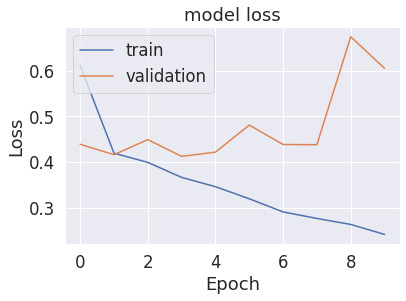

In [ ]:
plt.plot(historyvggTL.history['loss'])
plt.plot(historyvggTL.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

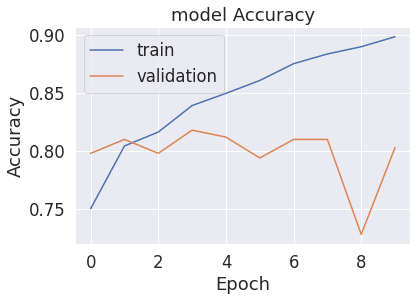

In [ ]:
plt.plot(historyvggTL.history['accuracy'])
plt.plot(historyvggTL.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
resultsvggTL = vggTL.evaluate(X_test, y_test)

32/32 [==============================] - 28s 882ms/step - loss: 0.6175 - accuracy: 0.7980


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred_unique=vggTL.predict(X_test)
y_pred1_2=y_pred_unique.round()
cr_vggTL=metrics.classification_report(y_test,y_pred1_2)
print(cr_vggTL)

32/32 [==============================] - 28s 880ms/step
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       683
           1       0.77      0.52      0.62       317

    accuracy                           0.80      1000
   macro avg       0.79      0.72      0.74      1000
weighted avg       0.79      0.80      0.79      1000



In [ ]:
cm_vggTL = confusion_matrix(y_test,y_pred1_2)

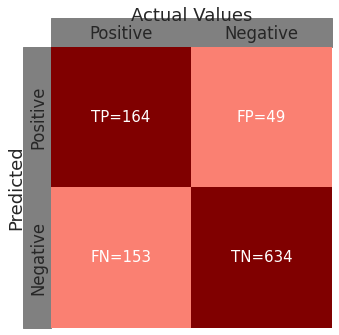

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['salmon', 'maroon'], as_cmap=True),
                 annot=[[f"TP={cm_vggTL[1][1]:.0f}", f"FP={cm_vggTL[0][1]:.0f}"], [f"FN={cm_vggTL[1][0]:.0f}", f"TN={cm_vggTL[0][0]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 15}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='grey', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='grey', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

In [ ]:
# del vggTL, historyvggTL, X_train, X_test, X_valid, y_train, y_test, y_valid, cr_vggTL, cm_vggTL, resultsvggTL

### 2. Transfer Learning using Resnet 50 

In [ ]:
final_traindf_annot = final_traindf_annot.reset_index()
final_traindf_annot.head(3)

patientId      x      y  width  height  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN   
1  000924cf-0f8d-42bd-9158-1af53881a557    NaN    NaN    NaN     NaN   
2  000db696-cf54-4385-b10b-6b16fbb3f985  316.0  318.0  170.0   478.0   

                                                path  Target  
0  /usr/stage_2_train_images/stage_2_train_images...       0  
1  /usr/stage_2_train_images/stage_2_train_images...       0  
2  /usr/stage_2_train_images/stage_2_train_images...       1

In [ ]:
uniquePatientdf = final_traindf_annot.drop_duplicates(subset='patientId',keep='first', inplace=False)
len(uniquePatientdf)

26684

In [ ]:
#  generate balanced class dataset 
uniquePatientdf_1 = uniquePatientdf[uniquePatientdf['Target'] == 1].head(3500)
uniquePatientdf_0 = uniquePatientdf[uniquePatientdf['Target'] == 0].head(3500)

In [ ]:
uniquePatientdfbal = pd.concat([uniquePatientdf_1, uniquePatientdf_0], axis=0, join='inner')
len(uniquePatientdfbal)

7000

In [ ]:
uniquePatientdfbal.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'path', 'Target'], dtype='object')

In [ ]:
# converting to Resnet50: 256x256 image size
def read_dicom_to_list_ResNet(data):
    img_data = list(data.T.to_dict().values())
    img_train_list = []
    for i,data_row in enumerate(img_data):
        data_row_img_data = dicom.read_file(data_row['path'])
        image = data_row_img_data.pixel_array
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)        
        img1 = cv2.resize(image, (256, 256))
        img_train_list.append(img1)   
    return img_train_list

In [ ]:
out2 = read_dicom_to_list_ResNet(uniquePatientdfbal)
uniquePatientdfbal['image'] = out2

In [ ]:
print(uniquePatientdfbal['Target'].value_counts())

1    3500
0    3500
Name: Target, dtype: int64


In [ ]:
# del out2

In [ ]:
X = uniquePatientdfbal['image']
y = uniquePatientdfbal['Target']

In [ ]:
# del uniquePatientdfbal

In [ ]:
#scaling train dataset
X_temp = []
for i in X:
  temp1 = (i/255.).astype(np.float32)
  X_temp.append(temp1)
X=np.asarray(X_temp)

In [ ]:
X.shape

(7000, 256, 256, 3)

In [ ]:
# del final_traindf_annot

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8,stratify=y)
X_valid, X_test, y_valid, y_test= train_test_split(X_rem,y_rem, test_size=0.5,stratify=y_rem)

In [ ]:
# del X_rem, y_rem, X, y

In [ ]:
#from keras.applications.resnet50 import 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import keras
IMG_HEIGHT = 256
IMG_WIDTH = 256

restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)

restnet = Model(restnet.input, outputs=output)



94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in restnet.layers[:-5]:
    layer.trainable = False

restnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
input_shape=(IMG_HEIGHT,IMG_WIDTH,3)
resnetTL = Sequential()
resnetTL.add(restnet)
resnetTL.add(Dense(1, activation='sigmoid'))
resnetTL.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
resnetTL.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 131072)            23587712  
                                                                 
 dense (Dense)               (None, 1)                 131073    
                                                                 
Total params: 23,718,785
Trainable params: 1,185,793
Non-trainable params: 22,532,992
_________________________________________________________________


In [ ]:
historyresnetTL=resnetTL.fit(X_train,y_train, epochs = 10,initial_epoch=0, verbose = 2,validation_data=(X_valid,y_valid))

Epoch 1/10
175/175 - 131s - loss: 1.0540 - accuracy: 0.5889 - val_loss: 1.2428 - val_accuracy: 0.5014 - 131s/epoch - 750ms/step
Epoch 2/10
175/175 - 127s - loss: 0.6502 - accuracy: 0.6827 - val_loss: 0.7277 - val_accuracy: 0.5900 - 127s/epoch - 728ms/step
Epoch 3/10
175/175 - 128s - loss: 0.6343 - accuracy: 0.6839 - val_loss: 1.1973 - val_accuracy: 0.5200 - 128s/epoch - 733ms/step
Epoch 4/10
175/175 - 128s - loss: 0.6314 - accuracy: 0.6889 - val_loss: 0.8410 - val_accuracy: 0.5614 - 128s/epoch - 733ms/step
Epoch 5/10
175/175 - 129s - loss: 0.6132 - accuracy: 0.6971 - val_loss: 0.7736 - val_accuracy: 0.6286 - 129s/epoch - 735ms/step
Epoch 6/10
175/175 - 130s - loss: 0.5698 - accuracy: 0.7188 - val_loss: 0.5999 - val_accuracy: 0.7057 - 130s/epoch - 744ms/step
Epoch 7/10
175/175 - 129s - loss: 0.6147 - accuracy: 0.7027 - val_loss: 1.6768 - val_accuracy: 0.5014 - 129s/epoch - 735ms/step
Epoch 8/10
175/175 - 130s - loss: 0.5857 - accuracy: 0.7177 - val_loss: 0.6016 - val_accuracy: 0.6814 - 

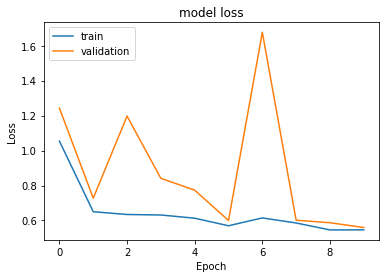

In [ ]:
plt.plot(historyresnetTL.history['loss'])
plt.plot(historyresnetTL.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

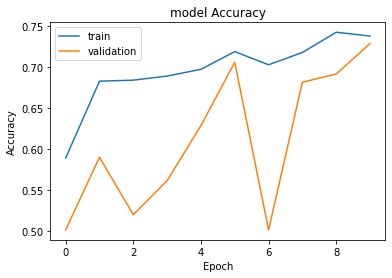

In [ ]:
plt.plot(historyresnetTL.history['accuracy'])
plt.plot(historyresnetTL.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
resultsresnetTL = resnetTL.evaluate(X_test, y_test)

22/22 [==============================] - 12s 537ms/step - loss: 0.5407 - accuracy: 0.7471


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred_unique=resnetTL.predict(X_test)
y_pred1_2=y_pred_unique.round()
cr_resnetTL=metrics.classification_report(y_test,y_pred1_2)
print(cr_resnetTL)

22/22 [==============================] - 13s 550ms/step
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       350
           1       0.81      0.64      0.72       350

    accuracy                           0.75       700
   macro avg       0.76      0.75      0.74       700
weighted avg       0.76      0.75      0.74       700



In [ ]:
cm_resnetTL = confusion_matrix(y_test,y_pred1_2)

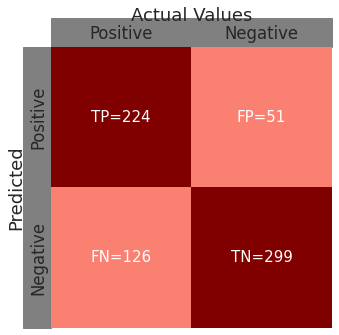

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['salmon', 'maroon'], as_cmap=True),
                 annot=[[f"TP={cm_resnetTL[1][1]:.0f}", f"FP={cm_resnetTL[0][1]:.0f}"], [f"FN={cm_resnetTL[1][0]:.0f}", f"TN={cm_resnetTL[0][0]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 15}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='grey', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='grey', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

In [ ]:
# del resnetTL, historyresnetTL, X_train, X_test, X_valid, y_train, y_test, y_valid, cr_resnetTL, cm_resnetTL, resultsresnetTL

### 3. Transfer Learning using Inception V3

In [ ]:
final_traindf_annot.head(3)

patientId      x      y  width  height  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN   
1  000924cf-0f8d-42bd-9158-1af53881a557    NaN    NaN    NaN     NaN   
2  000db696-cf54-4385-b10b-6b16fbb3f985  316.0  318.0  170.0   478.0   

                                                path  Target  
0  /usr/stage_2_train_images/stage_2_train_images...       0  
1  /usr/stage_2_train_images/stage_2_train_images...       0  
2  /usr/stage_2_train_images/stage_2_train_images...       1

In [ ]:
# converting to Inceptionv3: 224x224 image size
def read_dicom_to_list_Inceptionv3(data):
    img_data = list(data.T.to_dict().values())
    img_train_list = []
    for i,data_row in enumerate(img_data):
        data_row_img_data = dicom.read_file(data_row['path'])
        image = data_row_img_data.pixel_array
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)        
        img1 = cv2.resize(image, (224, 224))
        img_train_list.append(img1)   
    return img_train_list

In [ ]:
#Creating Train dataset with sample size 10000
final_traindf_sample = final_traindf_annot.sample(10000)
print(final_traindf_sample['Target'].value_counts())

0    6799
1    3201
Name: Target, dtype: int64


In [ ]:
out = read_dicom_to_list_Inceptionv3(final_traindf_sample)
final_traindf_sample['image'] = out
print(final_traindf_sample.shape)

(10000, 8)


In [ ]:
X = final_traindf_sample['image']
y = final_traindf_sample['Target']

In [ ]:
#scaling train dataset
X_temp = []
for i in X:
  temp1 = (i/255.).astype(np.float32)
  X_temp.append(temp1)
X=np.asarray(X_temp)

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8,stratify=y)
X_valid, X_test, y_valid, y_test= train_test_split(X_rem,y_rem, test_size=0.5,stratify=y_rem)

In [ ]:
del X_rem, y_rem, X, y, final_traindf_sample, out

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [ ]:
inceptionv3model = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
inceptionv3model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

In [ ]:
for i in inceptionv3model.layers:
  i.trainable=False

In [ ]:
inceptionv3TL = Sequential()
inceptionv3TL.add(inceptionv3model)
inceptionv3TL.add(Flatten())
inceptionv3TL.add(Dense(256, activation='relu')) #Dense layer with 256 neurons
inceptionv3TL.add(Dense(1, activation='sigmoid')) #output layer with single neuron

In [ ]:
inceptionv3TL.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               13107456  
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 34,910,497
Trainable params: 13,107,713
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
inceptionv3TL.compile(
  loss='binary_crossentropy',
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  metrics=['accuracy']
)

In [ ]:
%%time
np.random.seed(42)
tf.random.set_seed(42)
import datetime
historyinceptionv3TL = inceptionv3TL.fit(X_train,y_train, epochs = 10,initial_epoch=0, verbose = 2,validation_data=(X_valid,y_valid))

Epoch 1/10
250/250 - 81s - loss: 1.4710 - accuracy: 0.6520 - val_loss: 0.6675 - val_accuracy: 0.6800 - 81s/epoch - 325ms/step
Epoch 2/10
250/250 - 75s - loss: 0.6570 - accuracy: 0.6799 - val_loss: 0.6474 - val_accuracy: 0.6800 - 75s/epoch - 298ms/step
Epoch 3/10
250/250 - 73s - loss: 0.6415 - accuracy: 0.6800 - val_loss: 0.6366 - val_accuracy: 0.6800 - 73s/epoch - 294ms/step
Epoch 4/10
250/250 - 74s - loss: 0.6335 - accuracy: 0.6800 - val_loss: 0.6311 - val_accuracy: 0.6800 - 74s/epoch - 297ms/step
Epoch 5/10
250/250 - 76s - loss: 0.6296 - accuracy: 0.6800 - val_loss: 0.6285 - val_accuracy: 0.6800 - 76s/epoch - 304ms/step
Epoch 6/10
250/250 - 76s - loss: 0.6279 - accuracy: 0.6800 - val_loss: 0.6274 - val_accuracy: 0.6800 - 76s/epoch - 305ms/step
Epoch 7/10
250/250 - 76s - loss: 0.6272 - accuracy: 0.6800 - val_loss: 0.6271 - val_accuracy: 0.6800 - 76s/epoch - 303ms/step
Epoch 8/10
250/250 - 76s - loss: 0.6270 - accuracy: 0.6800 - val_loss: 0.6269 - val_accuracy: 0.6800 - 76s/epoch - 304

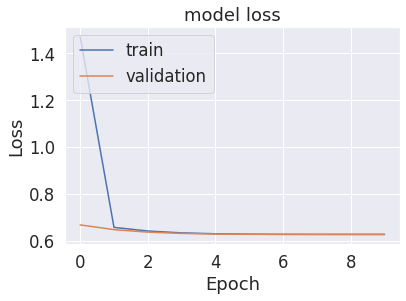

In [ ]:
plt.plot(historyinceptionv3TL.history['loss'])
plt.plot(historyinceptionv3TL.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

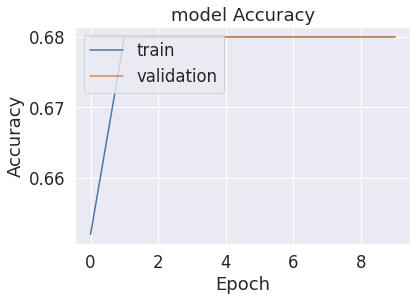

In [ ]:
plt.plot(historyinceptionv3TL.history['accuracy'])
plt.plot(historyinceptionv3TL.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
resultsinceptionv3TL = inceptionv3TL.evaluate(X_test, y_test)

32/32 [==============================] - 8s 253ms/step - loss: 0.6269 - accuracy: 0.6800


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred_unique=inceptionv3TL.predict(X_test)
y_pred1_2=y_pred_unique.round()
cr_inceptionv3TL=metrics.classification_report(y_test,y_pred1_2)
print(cr_inceptionv3TL)

32/32 [==============================] - 10s 258ms/step
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       680
           1       0.00      0.00      0.00       320

    accuracy                           0.68      1000
   macro avg       0.34      0.50      0.40      1000
weighted avg       0.46      0.68      0.55      1000



In [ ]:
cm_inceptionv3TL = confusion_matrix(y_test,y_pred1_2)

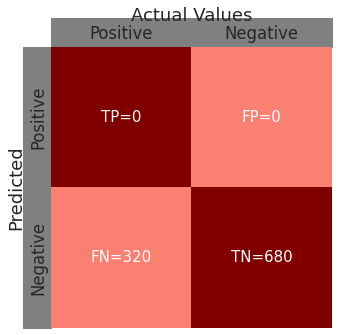

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['salmon', 'maroon'], as_cmap=True),
                 annot=[[f"TP={cm_inceptionv3TL[1][1]:.0f}", f"FP={cm_inceptionv3TL[0][1]:.0f}"], [f"FN={cm_inceptionv3TL[1][0]:.0f}", f"TN={cm_inceptionv3TL[0][0]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 15}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='grey', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='grey', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

In [ ]:
# del inceptionv3TL, historyinceptionv3TL, X_train, X_test, X_valid, y_train, y_test, y_valid, cr_inceptionv3TL, cm_inceptionv3TL, resultsinceptionv3TL

### 4. Transfer Learning using MobileNet

In [ ]:
final_traindf_annot.head(3)

level_0  index                             patientId      x      y  width  \
0        0      0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN   
1        1      1  000924cf-0f8d-42bd-9158-1af53881a557    NaN    NaN    NaN   
2        2      2  000db696-cf54-4385-b10b-6b16fbb3f985  316.0  318.0  170.0   

   height                                               path  Target  
0     NaN  /usr/stage_2_train_images/stage_2_train_images...       0  
1     NaN  /usr/stage_2_train_images/stage_2_train_images...       0  
2   478.0  /usr/stage_2_train_images/stage_2_train_images...       1

In [ ]:
# converting to MobileNet: 224x224 image size
def read_dicom_to_list_MobileNet(data):
    img_data = list(data.T.to_dict().values())
    img_train_list = []
    for i,data_row in enumerate(img_data):
        data_row_img_data = dicom.read_file(data_row['path'])
        image = data_row_img_data.pixel_array
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)        
        img1 = cv2.resize(image, (224, 224))
        img_train_list.append(img1)   
    return img_train_list

In [ ]:
#Creating Train dataset with sample size 10000
final_traindf_sample = final_traindf_annot.sample(10000)
print(final_traindf_sample['Target'].value_counts())

0    6829
1    3171
Name: Target, dtype: int64


In [ ]:
out = read_dicom_to_list_MobileNet(final_traindf_sample)
final_traindf_sample['image'] = out
print(final_traindf_sample.shape)

(10000, 10)


In [ ]:
X = final_traindf_sample['image']
y = final_traindf_sample['Target']

In [ ]:
#scaling train dataset
X_temp = []
for i in X:
  temp1 = (i/255.).astype(np.float32)
  X_temp.append(temp1)
X=np.asarray(X_temp)

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8,stratify=y)
X_valid, X_test, y_valid, y_test= train_test_split(X_rem,y_rem, test_size=0.5,stratify=y_rem)

In [ ]:
del X_rem, y_rem, X, y, final_traindf_sample, out

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
x = mobile.layers[-5].output

In [ ]:
x

<KerasTensor: shape=(None, 1, 1, 1024) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)
output = Dense(units=1, activation='sigmoid')(x)

In [ ]:
output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_13')>

In [ ]:
from tensorflow.keras import Model
mobilenetmodel = Model(inputs=mobile.input, outputs=output)

In [ ]:
for layer in mobilenetmodel.layers[:-22]:
    layer.trainable = False

In [ ]:
mobilenetmodel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [ ]:
# mobilenetTL = Sequential()
# mobilenetTL.add(mobilenetmodel)
# mobilenetTL.add(Flatten())
# mobilenetTL.add(Dense(256, activation='relu')) #Dense layer with 256 neurons
# mobilenetTL.add(Dense(1, activation='sigmoid')) #output layer with single neuron

In [ ]:
# mobilenetTL.summary()

In [ ]:
mobilenetmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_test.shape

(1000, 224, 224, 3)

In [ ]:
type(X_test)

numpy.ndarray

In [ ]:
X_train.shape

(8000, 224, 224, 3)

In [ ]:
historymobilenetTL=mobilenetmodel.fit(X_train,y_train, epochs = 10,initial_epoch=0, verbose = 2,validation_data=(X_valid,y_valid))

Epoch 1/10
250/250 - 55s - loss: 0.4674 - accuracy: 0.7995 - val_loss: 1.0478 - val_accuracy: 0.5330 - 55s/epoch - 222ms/step
Epoch 2/10
250/250 - 50s - loss: 0.3621 - accuracy: 0.8370 - val_loss: 0.6975 - val_accuracy: 0.7310 - 50s/epoch - 201ms/step
Epoch 3/10
250/250 - 49s - loss: 0.3040 - accuracy: 0.8660 - val_loss: 1.1665 - val_accuracy: 0.6900 - 49s/epoch - 195ms/step
Epoch 4/10
250/250 - 50s - loss: 0.2578 - accuracy: 0.8885 - val_loss: 1.4297 - val_accuracy: 0.5140 - 50s/epoch - 200ms/step
Epoch 5/10
250/250 - 49s - loss: 0.1913 - accuracy: 0.9212 - val_loss: 0.5712 - val_accuracy: 0.8220 - 49s/epoch - 198ms/step
Epoch 6/10
250/250 - 50s - loss: 0.1350 - accuracy: 0.9481 - val_loss: 0.7183 - val_accuracy: 0.7120 - 50s/epoch - 198ms/step
Epoch 7/10
250/250 - 49s - loss: 0.1037 - accuracy: 0.9620 - val_loss: 1.6691 - val_accuracy: 0.5330 - 49s/epoch - 197ms/step
Epoch 8/10
250/250 - 49s - loss: 0.0720 - accuracy: 0.9736 - val_loss: 5.4100 - val_accuracy: 0.3650 - 49s/epoch - 197

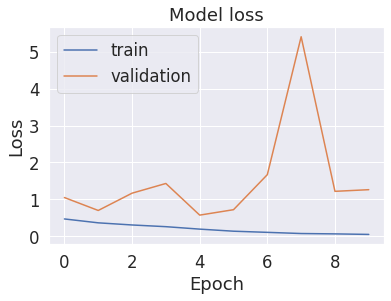

In [ ]:
plt.plot(historymobilenetTL.history['loss'])
plt.plot(historymobilenetTL.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

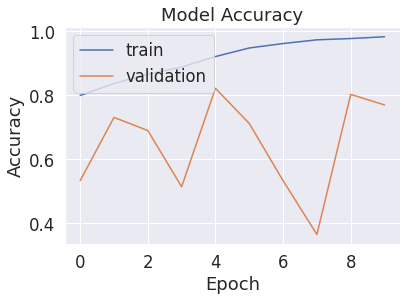

In [ ]:
plt.plot(historymobilenetTL.history['accuracy'])
plt.plot(historymobilenetTL.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
resultsmobilenetTL = mobilenetmodel.evaluate(X_test, y_test)

32/32 [==============================] - 4s 110ms/step - loss: 1.2333 - accuracy: 0.7820


In [ ]:
y_pred1=mobilenetmodel.predict(X_test)

32/32 [==============================] - 4s 113ms/step


In [ ]:
X_test.shape

(1000, 224, 224, 3)

In [ ]:
y_pred1.shape

(1000, 1)

In [ ]:
print(y_pred1[0]) # rounding to nearest integer to classify in binary 
y_pred1_1=y_pred1.round()
y_pred1_1[0]

[0.92664254]


array([1.], dtype=float32)

In [ ]:
from sklearn import metrics
cr_mobilenetTL=metrics.classification_report(y_test,y_pred1_1)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1040
           1       0.68      0.44      0.53       460

    accuracy                           0.76      1500
   macro avg       0.73      0.67      0.69      1500
weighted avg       0.75      0.76      0.75      1500



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm_mobilenetTL=confusion_matrix(y_test,y_pred1_1)

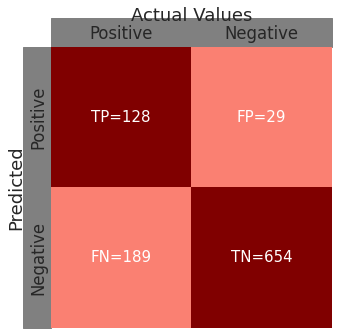

In [ ]:
sns.set(font_scale=1.5)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['salmon', 'maroon'], as_cmap=True),
                 annot=[[f"TP={cm_mobilenetTL[1][1]:.0f}", f"FP={cm_mobilenetTL[0][1]:.0f}"], [f"FN={cm_mobilenetTL[1][0]:.0f}", f"TN={cm_mobilenetTL[0][0]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 15}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='grey', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='grey', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

In [ ]:
# del mobilenetmodel, historymobilenetTL, X_train, X_test, X_valid, y_train, y_test, y_valid, cr_mobilenetTL, cm_mobilenetTL, resultsmobilenetTL #mobilenetTL

## Step 3: Design, train and test RCNN & its hybrids based object detection models to impose the bounding box or mask over the area of interest.

### We tried object detection using below models:
1. RCNN
2. Faster RCNN
3. UNET

### 1. RCNN

In [ ]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# Import math Library
import math

In [ ]:
cv2.setUseOptimized(True);
ss_object = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
train_data=[]
train_labels_data=[]

In [ ]:
def calculate_iou(bb_1, bb_2):
    '''
  Now we are initialising the function to calculate IOU (Intersection Over Union) 
  of the ground truth box from the box computed by selective search.
  To divide the generated ROI’s, for example, we can use a metric called IoU. 
  It’s defined as the intersection area divided by area of the union of a predicted 
  bounding box and ground-truth box.
  '''
  
    assert bb_1['x1'] < bb_1['x2']    # The assert keyword lets you test if a condition in your code returns True, 
    assert bb_1['y1'] < bb_1['y2']    # if not, the program will raise an AssertionError.
    assert bb_2['x1'] < bb_2['x2']
    assert bb_2['y1'] < bb_2['y2']

    x_left = max(bb_1['x1'], bb_2['x1'])
    y_top = max(bb_1['y1'], bb_2['y1'])
    x_right = min(bb_1['x2'], bb_2['x2'])
    y_bottom = min(bb_1['y2'], bb_2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection = (x_right - x_left) * (y_bottom - y_top)

    bb_1_area = (bb_1['x2'] - bb_1['x1']) * (bb_1['y2'] - bb_1['y1'])
    bb_2_area = (bb_2['x2'] - bb_2['x1']) * (bb_2['y2'] - bb_2['y1'])

    iou_value = intersection / float(bb_1_area + bb_2_area - intersection)
    assert iou_value >= 0.0
    assert iou_value <= 1.0
    return iou_value

4    /usr/stage_2_train_images/stage_2_train_images...
5    /usr/stage_2_train_images/stage_2_train_images...
Name: path, dtype: object
(1024, 1024)
(1024, 1024, 3)


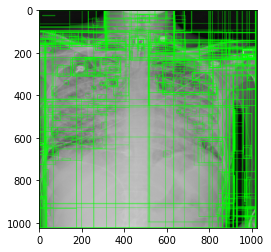

In [ ]:
image_path = final_traindf_annot[final_traindf_annot['patientId']==final_traindf_annot['patientId'][5]]['path']
#  image_path.reset_index()
print(image_path)
input_image = dicom.read_file(image_path[image_path.index[0]]).pixel_array
print(input_image.shape)
if len(input_image.shape) != 3 or input_image.shape[2] != 3:
      input_image = np.stack((input_image,) * 3, -1)
print(input_image.shape)       
ss_object.setBaseImage(input_image)
ss_object.switchToSelectiveSearchFast()  #this method of createSelectiveSearchSegmentation()
rects = ss_object.process()    # The output of the process is a set of a potential ROI’s, depending on the size of the base image
new_input_image = input_image.copy() # create copy of the base image
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(new_input_image, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(new_input_image)

In [ ]:
MAX_REGION_PROPOSALS = 2000
list_patient_target1 = final_traindf_annot[final_traindf_annot["Target"]==1]['patientId']
list_patient_target1.count()

9555

In [ ]:
list_patient_target1_unique = list_patient_target1.unique()
list_patient_target1_unique.shape

(6012,)

In [ ]:
list_patient_target1_unique

array(['000db696-cf54-4385-b10b-6b16fbb3f985',
       '000fe35a-2649-43d4-b027-e67796d412e0',
       '001031d9-f904-4a23-b3e5-2c088acd19c6', ...,
       'ffd787b6-59ca-48cb-bd15-bcedd52cf37c',
       'fff0b503-72a5-446a-843d-f3d152e39053',
       'fffb2395-8edd-4954-8a89-ffe2fd329be3'], dtype=object)

Plot region proposals for image and label on basis of  IOU criteria with respect to bounding boxes from data set 

In [ ]:
from numpy.lib.nanfunctions import nanargmin
target1_cntr = 0
target0_cntr = 0
train_data = []
train_labels_data = []
pid_index = 0
for pid in list_patient_target1_unique[:300]:
    pid_index+=1
    print(pid,"list_patient_number",pid_index)
    image_path = final_traindf_annot[final_traindf_annot['patientId']==pid]['path']
 #  image_path.reset_index()
    print(image_path)
    image = dicom.read_file(image_path[image_path.index[0]]).pixel_array
    if len(image.shape) != 3 or image.shape[2] != 3:
      image = np.stack((image,) * 3, -1)  
    coordinates=[]
    match_pid_ittrrows = final_traindf_annot[final_traindf_annot['patientId']==pid]
    match_pid_ittrrows = match_pid_ittrrows.reset_index()
    loop_brak_flag = 0
    for index in range(match_pid_ittrrows.shape[0]):
      print(math.isnan(match_pid_ittrrows.iloc[index]['x']) == False)
      if  math.isnan(match_pid_ittrrows.iloc[index]['x']) == False:
        print("Non Nan value")
        x1 = int(match_pid_ittrrows.iloc[index]['x'])
        y1 = int(match_pid_ittrrows.iloc[index]['y'])
        x2 = int(match_pid_ittrrows.iloc[index]['x']+match_pid_ittrrows.iloc[index]['width'])
        y2 = int(match_pid_ittrrows.iloc[index]['y']+match_pid_ittrrows.iloc[index]['height'])
        coordinates.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
      else:
        print("NAN_Value")
        mobile_obj_img = image.copy()
        resized_image = cv2.resize(mobile_obj_img, (224,224), interpolation = cv2.INTER_AREA)
    #    train_data.append(resized_image)
    #     target_cntr += 1
    #    train_labels_data.append(0)
        loop_brak_flag = 1
        break
    if(loop_brak_flag == 1):
      continue  
    ss_object.setBaseImage(image)
    ss_object.switchToSelectiveSearchFast()
    ss_results = ss_object.process()
    image_new = image.copy()
    min_positive_samples = 0
    min_negative_samples = 0
    flag = 0
    foreground_flag = 0
    background_flag = 0
    for region,ss_coordinate in enumerate(ss_results):
         if region < MAX_REGION_PROPOSALS and flag == 0:  # Iterating over all the first 2000 results only which are passed by selective search
             for value in coordinates:
                x,y,w,h = ss_coordinate 
                #print(x,y,w,h)          
                iou = calculate_iou(value,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
#                print('iou',iou)
                if min_positive_samples < 10:
                   if iou > 0.5:
                       mobile_obj_img = image_new[y:y+h,x:x+w]
                       resized_image = cv2.resize(mobile_obj_img, (224,224), interpolation = cv2.INTER_AREA)
                       train_data.append(resized_image)
                       train_labels_data.append(1)
                       target1_cntr += 1
                       min_positive_samples += 1
                       print("Target1 index", target1_cntr)
                else :
                    foreground_flag = 1
                if min_negative_samples < 10:
                  if iou < 0.2:
                      mobile_obj_img = image_new[y:y+h,x:x+w]
                      resized_image = cv2.resize(mobile_obj_img, (224,224), interpolation = cv2.INTER_AREA)
                      train_data.append(resized_image)
#                      target0_cntr += 1
                      train_labels_data.append(0)
                      min_negative_samples += 1
#                      print("Target0 index", target0_cntr)
                else :
                  background_flag = 1
                if foreground_flag == 1 and background_flag == 1:
                    print("inside")
                    flag = 1
         else:
           print("regions=",region)
           break

000db696-cf54-4385-b10b-6b16fbb3f985 list_patient_number 1
2    /usr/stage_2_train_images/stage_2_train_images...
3    /usr/stage_2_train_images/stage_2_train_images...
Name: path, dtype: object
True
Non Nan value
True
Non Nan value
000fe35a-2649-43d4-b027-e67796d412e0 list_patient_number 2
4    /usr/stage_2_train_images/stage_2_train_images...
5    /usr/stage_2_train_images/stage_2_train_images...
Name: path, dtype: object
True
Non Nan value
True
Non Nan value
Target1 index 1
001031d9-f904-4a23-b3e5-2c088acd19c6 list_patient_number 3
6    /usr/stage_2_train_images/stage_2_train_images...
7    /usr/stage_2_train_images/stage_2_train_images...
Name: path, dtype: object
True
Non Nan value
True
Non Nan value
Target1 index 2
Target1 index 3
Target1 index 4
Target1 index 5
Target1 index 6
Target1 index 7
Target1 index 8
Target1 index 9
Target1 index 10
Target1 index 11
inside
inside
regions= 359
001916b8-3d30-4935-a5d1-8eaddb1646cd list_patient_number 4
9    /usr/stage_2_train_images/stage_

In [ ]:
print("Target1 count=",train_labels_data.count(1))
print("Target0 count=",train_labels_data.count(0))


Target1 count= 555
Target0 count= 3000


In [ ]:
# define independent and target features
X = np.array(train_data)
y = np.array(train_labels_data)

In [ ]:
print(X.shape)
print(y.shape)

(3555, 224, 224, 3)
(3555,)


In [ ]:
def scale_X_images(X_train):
  X_unique_temp = []
  for i in X_train:
    temp1 = (i/255.).astype(np.float32)
    X_unique_temp.append(temp1)
  X_unique=np.asarray(X_unique_temp)
  return X_unique

In [ ]:
X_scale = scale_X_images(X)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.losses import CategoricalCrossentropy

A pre trained CNN model VGG16 is selected

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=True)
vgg_model.summary()

553467096/553467096 [==============================] - 25s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

Pretrained model layers are frozen

In [ ]:
for layers in (vgg_model.layers)[:15]:
    print(layers)
    layers.trainable = False

The last predicting layer of the pre-trained model is removed and replaces them with our own predicting layers

In [ ]:
x = vgg_model.layers[-2].output

In [ ]:
x = Dense(2, activation="softmax")(x)

In [ ]:
model = Model(inputs = vgg_model.input, outputs = x)

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [ ]:
class My_Label_Binarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [ ]:
lb_object = My_Label_Binarizer()
Y =  lb_object.fit_transform(y)

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X_scale , Y, test_size = 0.10)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3199, 224, 224, 3) (356, 224, 224, 3) (3199, 2) (356, 2)


Now we will use Keras ImageDataGenerator to pass the dataset to the model. We will do some augmentation on the dataset like horizontal flip, vertical flip and rotation to increase the dataset.

In [ ]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
train_data = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
test_data = tsdata.flow(x=X_test, y=y_test)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoints = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq="epoch")
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
history = model.fit(train_data, steps_per_epoch= 10, epochs= 3, validation_data= test_data, validation_steps=2, callbacks=[checkpoints,early])

Epoch 1/3
10/10 [==============================] - ETA: 0s - loss: 1.8270 - accuracy: 0.7625
Epoch 1: val_accuracy improved from -inf to 0.92188, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 24s 1s/step - loss: 1.8270 - accuracy: 0.7625 - val_loss: 0.2883 - val_accuracy: 0.9219
Epoch 2/3
10/10 [==============================] - ETA: 0s - loss: 0.2944 - accuracy: 0.9060
Epoch 2: val_accuracy did not improve from 0.92188
10/10 [==============================] - 7s 753ms/step - loss: 0.2944 - accuracy: 0.9060 - val_loss: 0.3161 - val_accuracy: 0.8438
Epoch 3/3
10/10 [==============================] - ETA: 0s - loss: 0.2500 - accuracy: 0.8719
Epoch 3: val_accuracy did not improve from 0.92188
10/10 [==============================] - 5s 485ms/step - loss: 0.2500 - accuracy: 0.8719 - val_loss: 0.1605 - val_accuracy: 0.8438


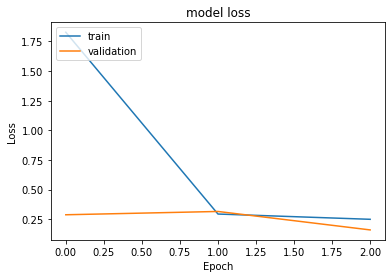

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

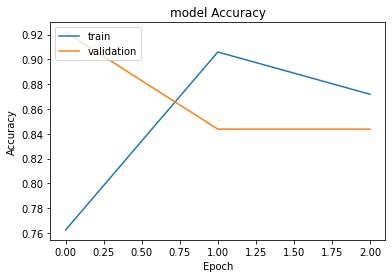

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred_unique=model.predict(test_data)
y_pred1_2=y_pred_unique.round()
cr_unique=metrics.classification_report(y_test,y_pred1_2)
print(cr_unique)

12/12 [==============================] - 6s 538ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.87      1.00      0.93       309

   micro avg       0.87      0.87      0.87       356
   macro avg       0.43      0.50      0.46       356
weighted avg       0.75      0.87      0.81       356
 samples avg       0.87      0.87      0.87       356



j = 0
401    /usr/stage_2_train_images/stage_2_train_images...
Name: path, dtype: object
1/1 [==============================] - 0s 16ms/step
pnuemonia detected
j = 1
1147    /usr/stage_2_train_images/stage_2_train_images...
1148    /usr/stage_2_train_images/stage_2_train_images...
Name: path, dtype: object
1/1 [==============================] - 0s 18ms/step
pnuemonia detected
j = 2
82    /usr/stage_2_train_images/stage_2_train_images...
83    /usr/stage_2_train_images/stage_2_train_images...
Name: path, dtype: object
1/1 [==============================] - 0s 16ms/step
pnuemonia detected
j = 3
605    /usr/stage_2_train_images/stage_2_train_images...
606    /usr/stage_2_train_images/stage_2_train_images...
Name: path, dtype: object
1/1 [==============================] - 0s 20ms/step
pnuemonia detected


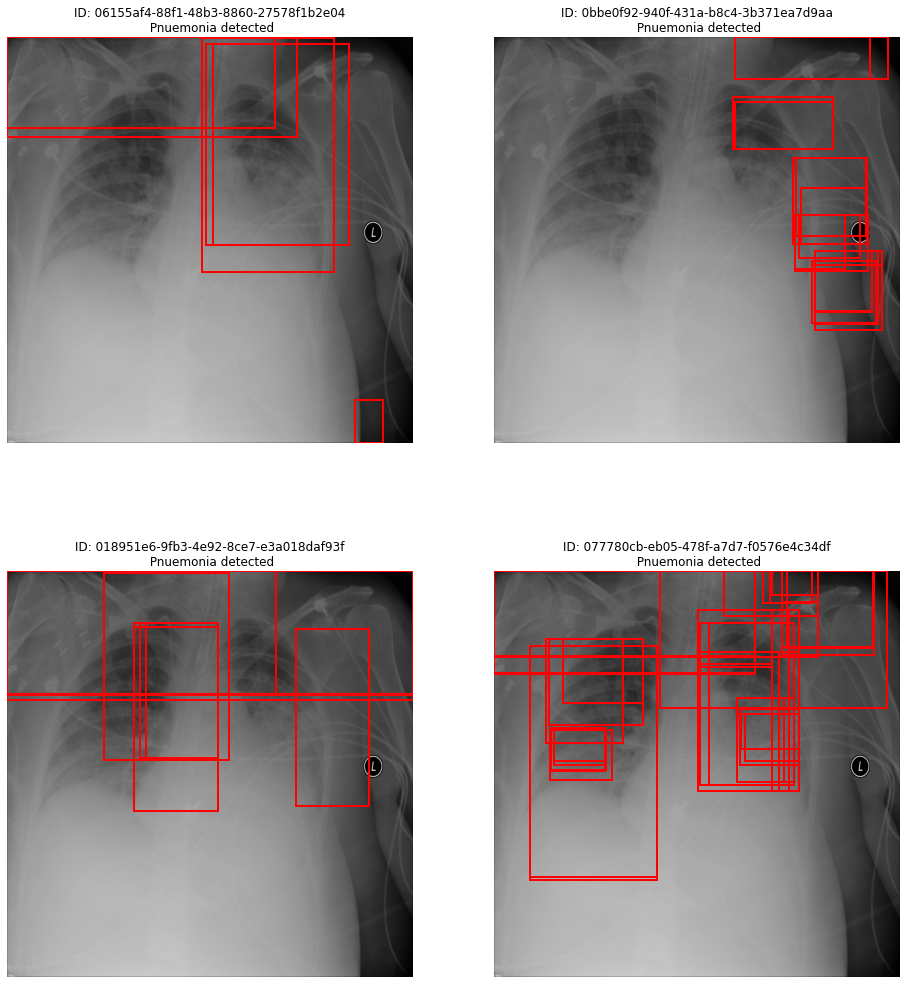

In [ ]:
from matplotlib.patches import Rectangle
patied_id_check_list = ['06155af4-88f1-48b3-8860-27578f1b2e04','0bbe0f92-940f-431a-b8c4-3b371ea7d9aa','018951e6-9fb3-4e92-8ce7-e3a018daf93f','077780cb-eb05-478f-a7d7-f0576e4c34df']
f, ax = plt.subplots(2,2, figsize=(16,18))
for j,pid in enumerate(patied_id_check_list):
  print('j =',j)
  image_path = final_traindf_annot[final_traindf_annot['patientId'] == pid]['path']
  #  image_path.reset_index()
  print(image_path)
  img = dicom.read_file(image_path[image_path.index[0]]).pixel_array
  if len(img.shape) != 3 or img.shape[2] != 3:
      img = np.stack((img,) * 3, -1)
  ss_object.setBaseImage(img)
  ss_object.switchToSelectiveSearchFast()
  ssresults = ss_object.process()
  img_new = img.copy()
  detect_flag = 0
  for i,result in enumerate(ssresults):
      if i < 2000:
          x,y,w,h = result
          timage = img_new[y:y+h,x:x+w]
          resized_image = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
          resized_image = resized_image/255
          img = np.expand_dims(resized_image, axis=0)
          prediction = model.predict(img)
#          print(prediction)
          if prediction[0][0] > 0.47:
#              cv2.rectangle(img_new, (x, y), (x+w, y+h), (255, 0, 0), 3, cv2.LINE_AA)
              ax[j//2, j%2].imshow(image_new, cmap=plt.cm.bone) 
              ax[j//2, j%2].axis('off')
              ax[j//2, j%2].set_title('ID: {}\n Pnuemonia detected'.format(pid))
              ax[j//2, j%2].add_patch(Rectangle(xy=(x, y),
                                               width=w,height=h,
                                               linewidth=2, edgecolor='r', 
                                               facecolor='none'))
#              print("pnuemonia detected")
              detect_flag = 1
  if detect_flag == 1:
    print("pnuemonia detected")
  else:
    print("pnuemonia not detected")
plt.show()      
#  plt.figure()
#  plt.imshow(img_new)

### 2. Faster RCNN

The model that we are going to use is [Faster R-CNN](https://arxiv.org/abs/1506.01497) (Region-based Convolutional Neural Network). For convenient training, evaluation and visualization we will use [Torchvision](https://pytorch.org/vision/stable/index.html) package.

In [ ]:
# !pip install pytorch_lightning

In [ ]:
#################################################################################################################################
#Import necessary packages to be used in the project, such as numpy,pandas,matplotlib,seaborn,scipy and statsmodels.
import numpy as np   #numpy is a package for all mathematical,logical calculation. It can be used to create and operate arrays.
import pandas as pd  #pandas is a package for data structures and operation.
import matplotlib.pyplot as plt  #matplotlib is a package for data visualization.
import scipy.stats as stats  #scipy is a package for mathematics, science and engineering.
import seaborn as sns  #seaborn is a package for data visualization.
import plotly.express as px
import time
import warnings
import glob
import os
import random
warnings.filterwarnings('ignore')
%matplotlib inline  
#Importing libraries from sklearn.
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

In [ ]:
#importing other Libraries.
# from zipfile import ZipFile
import cv2
from PIL import Image
import imagesize

In [ ]:
!pip install pydicom
import pydicom as dicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torchvision
import pydicom
import PIL
import glob

In [ ]:
# Setting up the variables for Faster RCNN using PyTorch
seed = 42
num_classes = 2
batch_size = 10
train_img_size = 256 
origin_img_size = 1024
scale_factor = train_img_size / origin_img_size
np.random.seed(seed)
TRAIN_DIR = "/usr/stage_2_train_images/stage_2_train_images"
#TEST_DIR = "stage_2_test_images"
ROOT_DIR = "/content/drive/MyDrive/AIML CAPSTONE/CV capstone dataset"
LABELS_FILE = "stage_2_train_labels.csv"
SUBMISSION_FILE = "stage_2_sample_submission.csv"
rcnn_losses = ["loss_objectness", "loss_box_reg", "loss_rpn_box_reg"]

In [ ]:
train_imgs = os.listdir(TRAIN_DIR)
test_imgs =  [patienId + ".dcm" for patienId in pd.read_csv(os.path.join(ROOT_DIR, SUBMISSION_FILE)).patientId]

Taking a sample of 5000 records.

In [ ]:
sample = train_imgs[0:5000]

Let's split our training dataset into training and validation sets. We leave a third of training samples for validation.

In [ ]:
from sklearn.model_selection import train_test_split

train_imgs, valid_imgs = train_test_split(sample, test_size=0.3, random_state=seed)

print(f"Number of training samples: {len(train_imgs)}")
print(f"Number of validation samples: {len(valid_imgs)}")

Number of training samples: 3500
Number of validation samples: 1500


Pneumonia bounding boxes coordinates are sored in stage_2_train_labels.csv file. There are a lot of lines with zero target value and NaN value in box columns. These lines represent images without bounding box.

In [ ]:
train_label_df = pd.read_csv(os.path.join(ROOT_DIR, LABELS_FILE))
train_label_df.head()

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

Our model require box coordinates in format X0, X1. We also multiply bounding box coordinates with scale_factor since we will train our model on images of size 256 instead of their original size 1024. R-CNN also require area of bounding box as input.

In [ ]:
isna_count = len(train_label_df[train_label_df.Target == 0]) # number of images without bounding box
train_label_df = train_label_df[train_label_df.Target == 1]
train_label_df.rename(columns={"x": "X0", "y": "Y0"}, inplace=True)
train_label_df["X1"] = train_label_df["X0"] + train_label_df["width"]
train_label_df["Y1"] = train_label_df["Y0"] + train_label_df["height"]
train_label_df[["X0", "X1", "Y0", "Y1"]] = train_label_df[["X0", "X1", "Y0", "Y1"]] * scale_factor
train_label_df["area"] = train_label_df["width"] * scale_factor * train_label_df["height"] * scale_factor
train_label_df.drop(["width", "height"], axis=1, inplace=True)
train_label_df.head()

patientId      X0      Y0  Target      X1  \
4   00436515-870c-4b36-a041-de91049b9ab4   66.00   38.00       1  119.25   
5   00436515-870c-4b36-a041-de91049b9ab4  140.50   38.00       1  204.50   
8   00704310-78a8-4b38-8475-49f4573b2dbb   80.75  144.25       1  120.75   
9   00704310-78a8-4b38-8475-49f4573b2dbb  173.75  143.75       1  214.25   
14  00aecb01-a116-45a2-956c-08d2fa55433f   72.00   80.50       1   95.50   

        Y1       area  
4   132.75  5045.4375  
5   151.25  7248.0000  
8   170.25  1040.0000  
9   178.00  1387.1250  
14  114.25   793.1250

In [ ]:
from collections import Counter

cnt = Counter(train_label_df.patientId)
sample_batch = [sample[0] + ".dcm" for sample in cnt.most_common(2)] # We will take two imgs with 4 boxes to display
counts = pd.Series(cnt.values()).value_counts()
counts[0] = isna_count

In [ ]:
from torchvision.utils import draw_bounding_boxes, make_grid


def find_boxes(img_name, label_df): 
    patient_id = img_name.split(".")[0]
    boxes = label_df[label_df.patientId == patient_id]
    boxes_coord = boxes[["X0", "Y0", "X1", "Y1"]].to_numpy()
    
    return boxes_coord, boxes.area.to_numpy()


def read_images(img_names, label_df, resize):
    batch = []
    for img_name in img_names:
        img_path = os.path.join(ROOT_DIR, TRAIN_DIR, img_name)
        img = PIL.Image.fromarray(pydicom.dcmread(img_path).pixel_array).convert("RGB")
        img = img.resize(resize)
        img = np.array(img)
       
        boxes, _ = find_boxes(img_name, label_df)

        img = torch.tensor(img, dtype=torch.uint8)
        boxes = torch.tensor(boxes, dtype=torch.int32)
        batch.append((img, boxes))
    return batch


def plot_samples(batch, n_rows=3, n_cols=5, box_color="red", titles=None, box_width=3, fig_size=(20,12)):
    assert len(batch) >= n_rows * n_cols, f"Not enough samples to display, required at least {n_rows * n_cols} samples"
    fig, axs = plt.subplots(n_rows, 1, figsize=fig_size)
    fig.tight_layout()
    imgs_with_boxes = []
    for sample in batch[:n_rows * n_cols]:
        scores = None
        if len(sample) == 2:
            image, boxes = sample
        else:
            image, boxes, scores = sample 
            scores = [f"Score: {score:.2f}" for score in scores]
            
        img = draw_bounding_boxes(image=image.permute(2, 0, 1), 
                                  boxes=boxes, 
                                  colors=box_color, 
                                  labels=scores,
                                  width=box_width)
        imgs_with_boxes.append(img)
        
    for i, ax in enumerate(axs): 
        if titles:
            ax.set_title(titles[i], fontsize=18)
        img_with_boxes = make_grid(imgs_with_boxes[i * n_cols: (i + 1) * n_cols]).numpy()       
        ax.imshow(np.transpose(img_with_boxes, (1, 2, 0)))
    plt.show()
       

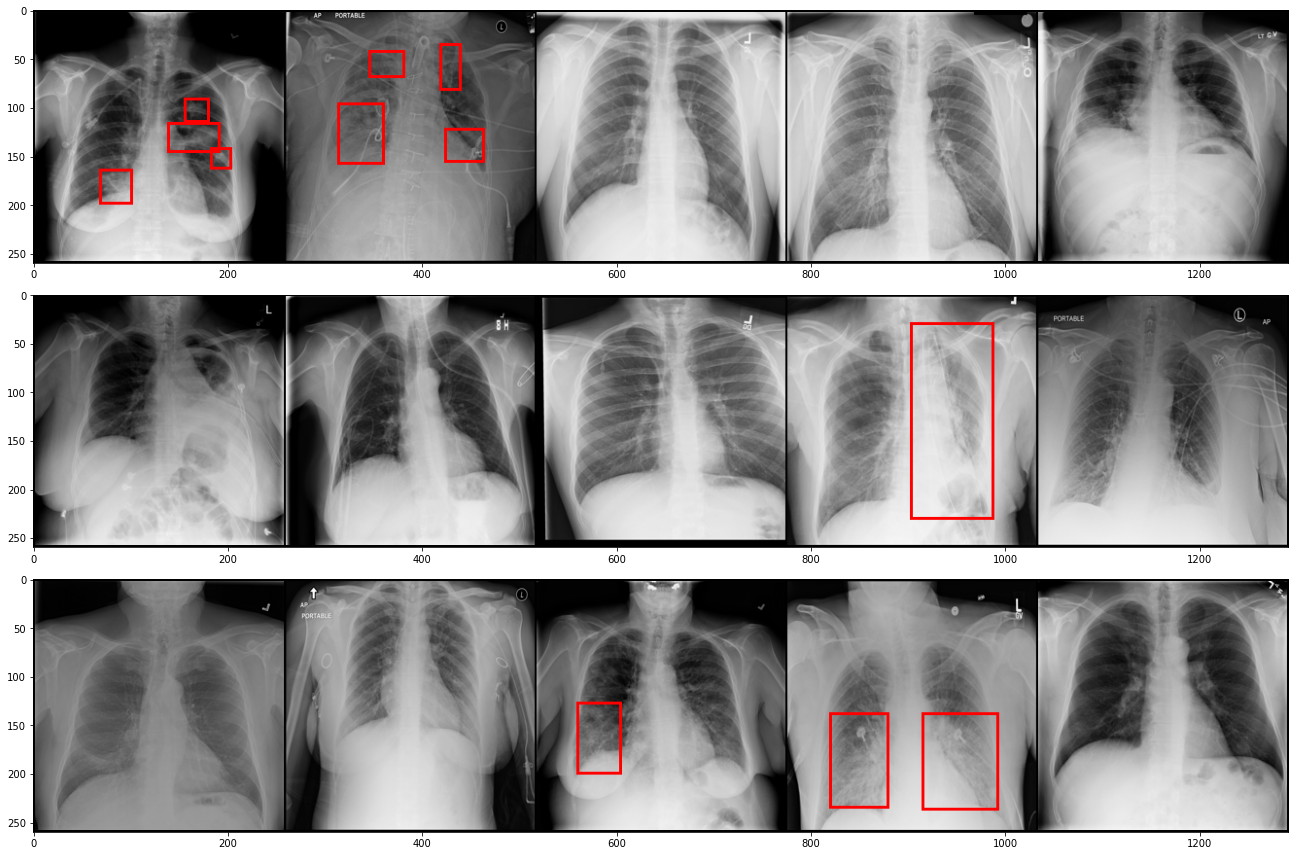

In [ ]:
sample_batch = np.concatenate([sample_batch, np.random.choice(train_imgs, size=13)])
sample_batch = read_images(sample_batch, train_label_df, (train_img_size, train_img_size))
plot_samples(sample_batch)

In [ ]:
from torchvision.transforms import PILToTensor, ConvertImageDtype

class PneumoniaDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms, img_names, train_img_size, labels=None):
        self.root = root
        self.transforms = transforms
        self.img_names = img_names
        self.resize = (train_img_size, train_img_size)       
        self.labels = labels
        
    def __getitem__(self, idx):
        """Load image, boxes and process them"""
        img_name = self.img_names[idx]
       
        img_path = os.path.join(self.root, self.img_names[idx])
        img = PIL.Image.fromarray(pydicom.dcmread(img_path).pixel_array).convert("RGB")
        img = img.resize(self.resize)
        img = np.array(img)
                 
        if self.labels is None:           
            return torch.tensor(img / 255.).permute(2, 0, 1).float() 
        
        boxes, area = find_boxes(img_name, self.labels)
        n_objects = len(boxes) 
        if self.transforms is not None:            
            img, boxes = self.transforms(img, boxes)
            
        img = torch.tensor(img / 255.).permute(2, 0, 1).float() 
               
        target = {}
        target["image_id"] = torch.tensor([idx])
        target["boxes"] = torch.as_tensor(boxes, dtype=torch.float32)
        target["labels"] = torch.ones(n_objects, dtype=torch.int64)
        target["area"] = torch.as_tensor(area, dtype=torch.float32)
        target["iscrowd"] = torch.zeros(n_objects, dtype=torch.int32)
        return img, target
        
    def __len__(self):
        return len(self.img_names)
    
    def collate_fn(self, batch):
        return tuple(zip(*batch))    

In [ ]:
from torch.utils.data import DataLoader

train_ds = PneumoniaDataset(os.path.join(ROOT_DIR, TRAIN_DIR),None, train_imgs, train_img_size, train_label_df)
valid_ds = PneumoniaDataset(os.path.join(ROOT_DIR, TRAIN_DIR), None, valid_imgs, train_img_size, train_label_df)
#test_ds = PneumoniaDataset(os.path.join(ROOT_DIR, TEST_DIR), None, test_imgs, train_img_size)

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=train_ds.collate_fn)  
#                           
valid_loader = DataLoader(valid_ds, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=valid_ds.collate_fn) 
#test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=2) 

We will fine-tune a model trained on COCO dataset. For this purpose we have to replace model classifier with a new one adapted to our task. Our model will exploit [Resnet50](https://arxiv.org/pdf/1512.03385v1.pdf) as backbone. We incorporate our model into [PyTorch lightning](https://www.pytorchlightning.ai/) module. This way we can easily train and validate our model. 

In [ ]:
import pytorch_lightning as pl
from torchvision.ops import nms
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor


class LitRCNN(pl.LightningModule):    
    def __init__(self, num_classes):
        super().__init__()

        model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
        in_features = model.roi_heads.box_predictor.cls_score.in_features
        model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
               
        self.model = model
        
    def forward(self, x):
        self.model.eval()
        
        outputs =  self.model(x)
        
        preds = []
        for output in outputs:       
            boxes = output["boxes"]
            scores = output["scores"]
            idx = nms(boxes,scores, 0.05)
            preds.append({"boxes": boxes[idx].cpu().detach().numpy(), "scores": scores[idx].cpu().detach().numpy()})
        
        return preds
        
    def training_step(self, batch, batch_idx):   
        images, targets = batch   
               
        losses = self.model(images, targets)  
      
        loss = sum(loss for loss in losses.values())        
        self.log_losses(loss, losses)   
        
        return loss
    
    def validation_step(self, batch, batch_idx):     
        self.model.train()
        
        images, targets = batch 
        losses = self.model(images, targets)
      
        loss = sum(loss for loss in losses.values())   
        self.log_losses(loss, losses, mode="val")
        
    def predict_step(self, batch, batch_idx):   
        return self.forward(batch)    
       
    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(),  lr=0.005, momentum=0.9, weight_decay=0.0005)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.3)
        
        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,  
                "interval": "epoch",
                "frequency": 1}}
    
    def log_losses(self, loss, losses, mode="train"): 
        self.log_dict({f"{mode}_loss": loss,                   
                       f"{mode}_loss_box_reg": losses['loss_box_reg'],
                       f"{mode}_loss_objectness": losses['loss_objectness'],
                       f"{mode}_loss_rpn_box_reg": losses['loss_rpn_box_reg']}, on_step=False, on_epoch=True, batch_size=batch_size)

model = LitRCNN(num_classes)

define some callbacks for logging and model checkpoints.

In [ ]:
from pytorch_lightning import Callback
from pytorch_lightning.callbacks import ModelCheckpoint


class MetricsCallback(Callback):
    """PyTorch Lightning metric callback."""

    def __init__(self, metrics):
        super().__init__()
        self.metrics = metrics      
        self.training = {}
        self.validations = {}
        
    def on_train_epoch_end(self, trainer, pl_module):
        self.training[trainer.current_epoch] = {metric: trainer.callback_metrics["train_" + metric] for metric in self.metrics}

    def on_validation_end(self, trainer, pl_module):        
        self.validations[trainer.current_epoch] = {metric: trainer.callback_metrics["val_" + metric] for metric in self.metrics}
        

checkpoint_callback = ModelCheckpoint(dirpath='checkpoints',
                                      filename='{epoch}-{val_loss:.4f}',
                                      every_n_epochs=1,
                                      monitor='val_loss',
                                      save_top_k=1,
                                      mode='min')

callbacks = [MetricsCallback(["loss"] + rcnn_losses), checkpoint_callback]

Training

In [ ]:
device = "gpu" if torch.cuda.is_available() else "cpu"
trainer = pl.Trainer(accelerator=device, max_epochs=6, callbacks=callbacks) 
trainer.fit(model=model, train_dataloaders=train_loader, val_dataloaders=valid_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type       | Params
-------------------------------------
0 | model | FasterRCNN | 41.3 M
-------------------------------------
41.1 M    Trainable params
222 K     Non-trainable params
41.3 M    Total params
165.197   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=6` reached.


In [ ]:
model = LitRCNN.load_from_checkpoint(trainer.checkpoint_callback.best_model_path, num_classes=num_classes)
print(trainer.checkpoint_callback.best_model_path)

/content/checkpoints/epoch=3-val_loss=0.0822.ckpt


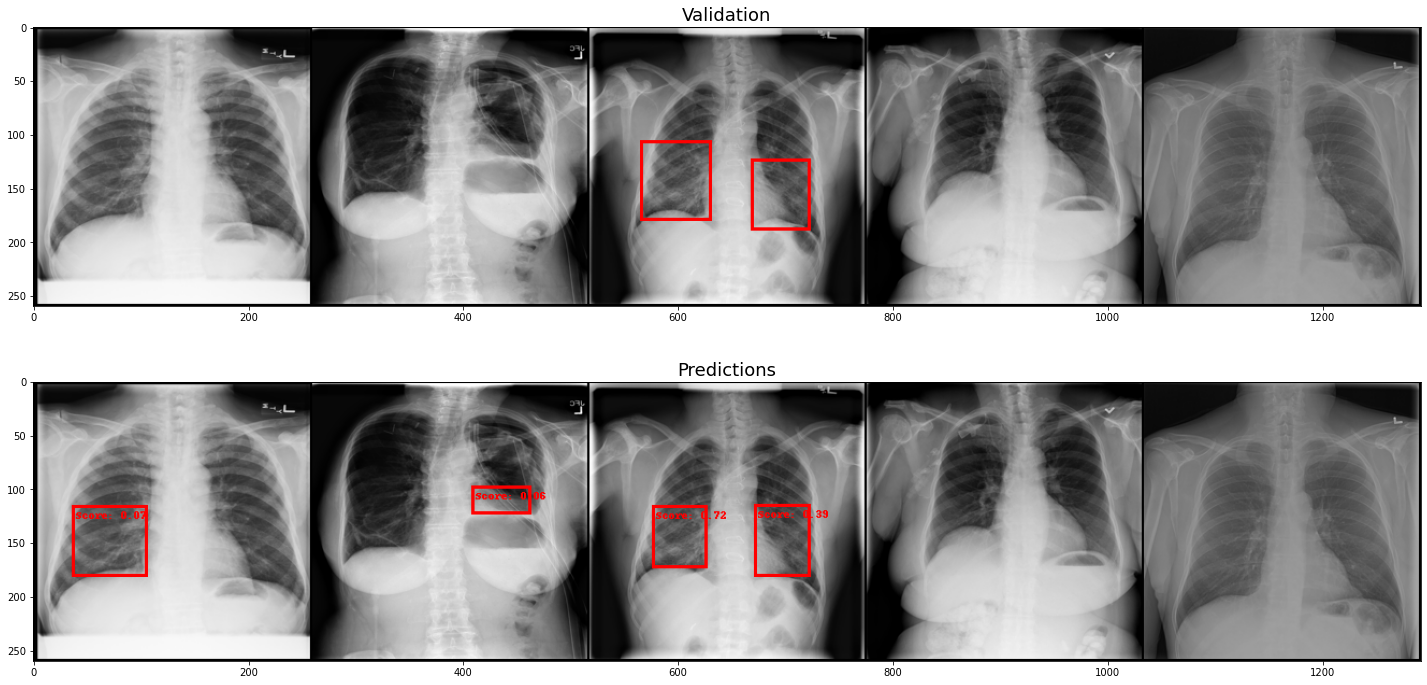

In [ ]:
sample_batch_idx = np.random.choice(len(valid_imgs), size=5)
sample_batch = read_images(np.array(valid_ds.img_names)[sample_batch_idx], train_label_df, (train_img_size, train_img_size))

preds = model([valid_ds[i][0] for i in sample_batch_idx])
for i, pred in enumerate(preds):
    sample_batch.append((sample_batch[i][0], 
                         torch.tensor(pred["boxes"], dtype=torch.int32),
                         pred["scores"]))
    
plot_samples(sample_batch, titles=["Validation", "Predictions"], fig_size=(20, 10), n_rows=2)

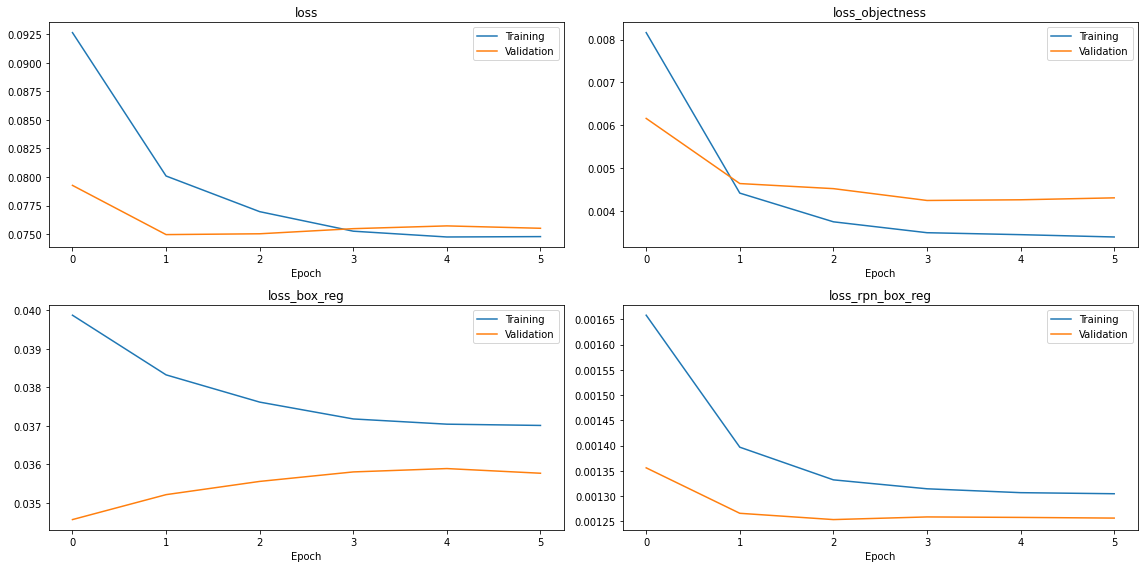

In [ ]:
# pneumonia_locationssns.set_style("whitegrid")
training = pd.DataFrame.from_dict(callbacks[0].training, orient="index").applymap(lambda x: x.cpu().numpy())
validations = pd.DataFrame.from_dict(callbacks[0].validations, orient="index").applymap(lambda x: x.cpu().numpy())
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

for ax, metric in zip(axs.flat, callbacks[0].metrics):    
    ax.set_title(metric)
    
    g = sns.lineplot(data=training, x=training.index, y=metric, ax=ax)
    g = sns.lineplot(data=validations, x=validations.index, y=metric, ax=ax)
    g.set(xlabel="Epoch", ylabel=None)
    g.set_xticks(training.index)
    ax.legend(labels=["Training","Validation"])
  
fig.tight_layout()
plt.show()

In [ ]:
history = trainer.validate(model, dataloaders=valid_loader, verbose=False)
pd.DataFrame(history, index=["Validation"]).T

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

Validation
val_loss                0.075522
val_loss_box_reg        0.035769
val_loss_objectness     0.004320
val_loss_rpn_box_reg    0.001256

Pickle the model for future prediction

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('/usr/rcnnmodel.pkl','wb'))

In [ ]:
import shutil

In [ ]:
shutil.copy('/usr/rcnnmodel.pkl', '/content/drive/MyDrive/AIML CAPSTONE/FRCNN/rcnnmodel.pkl')

'/content/drive/MyDrive/AIML CAPSTONE/FRCNN/rcnnmodel.pkl'

In [ ]:
shutil.copy('/content/drive/MyDrive/AIML CAPSTONE/Milestone 1/CapstoneProject_FRCNN2.ipynb','/content/drive/MyDrive/AIML CAPSTONE/Milestone 1/CapstoneProject_FRCNN2.ipynb')

### 3. UNET 

In [ ]:
import pydicom as dicom
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
import csv
from tqdm.notebook import tqdm, tnrange
from skimage.transform import resize
import random
import matplotlib.pyplot as plt
from zipfile import ZipFile
import pandas as pd
import math

In [ ]:
import keras

from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from tensorflow.keras.layers import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.metrics import MeanIoU
from keras.utils import to_categorical
from tensorflow.keras import layers
from keras.callbacks import CSVLogger
import datetime
     

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,array_to_img,load_img

In [ ]:
# !mkdir '/content/drive/MyDrive/AIML CAPSTONE/UNet/jpg_img'
# !mkdir '/content/drive/MyDrive/AIML CAPSTONE/UNet/mask_img'

In [ ]:
jpg_path = '/content/drive/MyDrive/AIML CAPSTONE/UNet/jpg_img'
# images_path = os.listdir('/content/drive/MyDrive/Great_Learning/dummy_train_images')
for n,images in enumerate(dir_train_img):
  ds = dicom.dcmread(os.path.join(path_train, images))
  ds_pixel_array = ds.pixel_array
  images = images.replace('.dcm','.jpg')
  cv2.imwrite(os.path.join(jpg_path,images),ds_pixel_array)
  if n % 100 == 0:
        print('{} image converted'.format(n))
  if n == 10000:
    break

In [ ]:
mask_path = "/content/drive/MyDrive/AIML CAPSTONE/UNet/mask_img"
labels = pd.read_csv("/content/drive/MyDrive/AIML CAPSTONE/CV capstone dataset/stage_2_train_labels.csv")

In [ ]:
labels.head()

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [ ]:
mask_path = "/content/drive/MyDrive/AIML CAPSTONE/UNet/mask_img/"
csv_path = "/content/drive/MyDrive/AIML CAPSTONE/CV capstone dataset/stage_2_train_labels.csv"

sheet = open(csv_path, newline='')
images_path = os.listdir('/content/drive/MyDrive/AIML CAPSTONE/UNet/jpg_img/')
images_path = [os.path.splitext(x)[0] for x in images_path]
images_path = [x.strip() for x in images_path]

In [ ]:
i=1
for image_name in images_path: 
    sheet = open(csv_path, newline='')
    reader = csv.reader(sheet)
    for row in reader:
      if row[0]==image_name:
        print(image_name)
        # print(i)
        i+=1
        if row[5]=='1':
          pt1 = (int(row[1].split('.')[0]),int(row[2].split('.')[0]))
          pt2 = int(row[1].split('.')[0])+int(row[3].split('.')[0]),int(row[2].split('.')[0])+int(row[4].split('.')[0])

          if os.path.isfile(mask_path+image_name+'.jpg')==True:       
            img = cv2.imread(mask_path+image_name+'.jpg')
          else:
            img = np.zeros((1024, 1024, 3), dtype = "uint8")
          cv2.rectangle(img, pt1, pt2, (255,255,255), -1)
          cv2.imwrite(mask_path+image_name+'.jpg', img)  
          # cv2_imshow(img)
        else:  
          img = np.zeros((256, 1600, 4), dtype=np.uint8)
          cv2.imwrite(mask_path+row[0]+'.jpg', img)
    sheet.close()

Loading images and masks into arrays

In [ ]:
images_path = "/content/drive/MyDrive/AIML CAPSTONE/UNet/jpg_img/"
ids = next(os.walk(images_path))[2] # list of names all images in the given path
print("No. of images = ", len(ids))

No. of images =  10001


Show image with mask

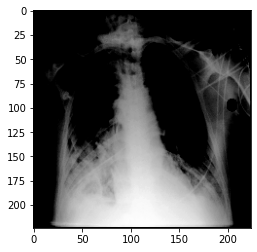

In [ ]:
# def showMaskedImage(_imageSet, _maskSet, _index) :
#     maskImage = _imageSet[_index]

#     maskImage[:,:,0] = _maskSet[_index] * _imageSet[_index][:,:,0]
#     maskImage[:,:,1] = _maskSet[_index] * _imageSet[_index][:,:,1]
#     maskImage[:,:,2] = _maskSet[_index] * _imageSet[_index][:,:,2]

#     plt.imshow(maskImage[:,:,0])
# ## One of the pre processed image from custom train generotr
# imageSet0 = trainUNetDataGen[45][0][1]
# plt.imshow(imageSet0);

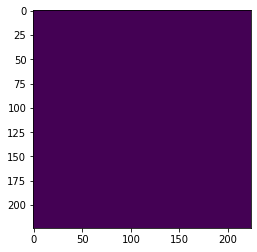

In [ ]:
## Masks for the same
# imageSet0 = trainUNetDataGen[45][0]
# maskSet0 = trainUNetDataGen[45][1]    
# showMaskedImage(imageSet0, maskSet0, 0)

In [ ]:
load_img(mask_path+'000fe35a-2649-43d4-b027-e67796d412e0.jpg',color_mode="grayscale")

In [ ]:
X = []
y = []

In [ ]:
err =1

for n, id_ in tqdm(enumerate(ids), total=len(ids)):
    print(id_)
    # Load images
    img = load_img(images_path+id_, color_mode = "grayscale")
    x_img = img_to_array(img)
    x_img = resize(x_img, (256, 256, 1), mode = 'constant', preserve_range = True)
    # print(x_img)
    # Load masks
    try:
      mask = load_img(mask_path+id_, color_mode = "grayscale")
      mask = img_to_array(mask)
      mask = resize(mask, (256, 256, 1), mode = 'constant', preserve_range = True)
      # print(mask)
    except Exception as e:
      err+=1
      print('e:',e)
      continue  
    # Save images
    X.append(x_img/255.0)
    y.append(mask/255.0)
    # X[n] = x_img/255.0
    # y[n] = mask/255.0


In [ ]:
len(X),len(y)

(9456, 9456)

Setting parameter for image dimension

In [ ]:
im_height = 256 
im_width = 256

**Data generator class for efficient data flow**

In [ ]:
class DataGenerator(keras.utils.Sequence):
    # Inherites keras.utils.Sequence for using functionalities such as multiprocessing
    'Generates data for Keras'
    def __init__(self, folder_path, csv_path, ratio, batch_size=32, img_height=256, img_width=256, shuffle=True, val= False):
        'Initialization'
        self.batch_size = batch_size
        self.folder_path = folder_path
        self.csv_path = csv_path
        self.ratio = ratio
        if val == False:
          self.image_names = os.listdir(folder_path)
          random.seed(2)
          random.shuffle(self.image_names)
          self.image_names = self.image_names[0:int(ratio*len(self.image_names))]
        else:
          self.image_names = os.listdir(folder_path)
          random.seed(2)
          random.shuffle(self.image_names)
          self.image_names = self.image_names[int(ratio*len(self.image_names)):-1]
        self.img_height = img_height
        self.img_width = img_width
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.image_names) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.image_names[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.image_names))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.zeros((self.batch_size, self.img_height, self.img_width, 1), dtype=np.float32)
        y = np.zeros((self.batch_size, self.img_height, self.img_width, 2), dtype=np.float32)

        # Generate data
        for n, image_name in enumerate(list_IDs_temp):
            ds = dicom.dcmread(os.path.join(self.folder_path, image_name))
            pixel_array_numpy = ds.pixel_array
            x_img = pixel_array_numpy
            x_img = resize(x_img, (self.img_height, self.img_width, 1), mode = 'constant', preserve_range = True)

            # Draw masks
            sheet = open(self.csv_path, newline='')
            reader = csv.reader(sheet)
            mask = np.zeros((1024, 1024, 1), dtype = "uint8")

            image_name = os.path.splitext(image_name)[0]
            image_name = image_name.strip()

            for row in reader:
              if row[0]==image_name:
                if row[5]=='1':
                  pt1 = (int(row[1].split('.')[0]),int(row[2].split('.')[0]))
                  pt2 = (int(row[1].split('.')[0])+int(row[3].split('.')[0]),int(row[2].split('.')[0])+int(row[4].split('.')[0]))
                  cv2.rectangle(mask, pt1, pt2, 255, -1)     
            sheet.close()
            mask = resize(mask, (self.img_height, self.img_width, 1), mode = 'constant', preserve_range = True)
            mask.astype(int)
            mask /= 255
            mask = tf.keras.utils.to_categorical(mask, num_classes=2, dtype='float32')
            #cv2_imshow(x_img)
            #cv2_imshow(mask)

            # Save images
            X[n] = x_img
            y[n] = mask

        return X, y

In [ ]:
# Datasets
images_path = '/usr/stage_2_train_images/stage_2_train_images'
print(images_path,'\n', csv_path)

/usr/stage_2_train_images/stage_2_train_images 
 /content/drive/MyDrive/AIML CAPSTONE/CV capstone dataset/stage_2_train_labels.csv


In [ ]:
# Generators
training_generator = DataGenerator(images_path, csv_path, 0.8, batch_size=32, img_height=256, img_width=256, shuffle=True, val=False)
validation_generator = DataGenerator(images_path, csv_path, 0.8, batch_size=32, img_height=256, img_width=256, shuffle=True, val=True)

In [ ]:
type(training_generator)

__main__.DataGenerator

4


Text(0.5, 1.0, 'mask')

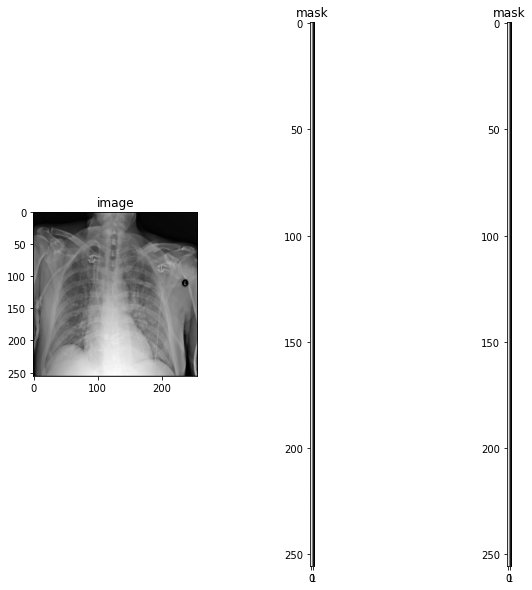

In [ ]:
gen = DataGenerator(images_path,csv_path, 0.8, batch_size = 32, img_height = 256, img_width = 256, shuffle = True, val = False)
x, y = gen.__getitem__(0)
     

# Visualize any random image along with the mask
ix = random.randint(0, len(x)-1)
print(ix)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 10))

ax1.imshow(x[ix].squeeze(), cmap = 'gray', interpolation = 'bilinear')
ax1.set_title('image')

ax2.imshow(y[ix][0].squeeze(), cmap = 'gray', interpolation = 'bilinear')
ax2.set_title('mask')

ax3.imshow(y[ix][1].squeeze(), cmap = 'gray', interpolation = 'bilinear')
ax3.set_title('mask')

In [ ]:
def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (1,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


In [ ]:
# Functions for dice coefficient metric and loss
from tensorflow.keras.losses import BinaryCrossentropy
def dice_coef(y_true, y_pred):

  smooth=1.0e-6
  #y_true_f_1 = tf.keras.backend.flatten(y_true[:,:,:,0])
  #y_pred_f_1 = tf.keras.backend.flatten(y_pred[:,:,:,0])
  y_true_f_2 = tf.keras.backend.flatten(y_true[:,:,:,1])
  y_pred_f_2 = tf.keras.backend.flatten(y_pred[:,:,:,1])
  #intersection_1 = tf.keras.backend.sum(y_true_f_1 * y_pred_f_1)
  intersection_2 = tf.keras.backend.sum(y_true_f_2 * y_pred_f_2)
  #union_1 = tf.keras.backend.sum(y_true_f_1) + tf.keras.backend.sum(y_pred_f_1)
  union_2 = tf.keras.backend.sum(y_true_f_2) + tf.keras.backend.sum(y_pred_f_2)
  
  score = 2*(intersection_2+smooth)/(union_2+smooth)
  return score
  
def DiceLoss(y_true, y_pred):

  score = dice_coef(y_true, y_pred)
  
  return 1 - score

In [ ]:
img_size = (im_height, im_width)
num_classes = 2
model = get_model(img_size, num_classes)
model.compile(optimizer=Adam(), loss = DiceLoss, metrics=[MeanIoU(num_classes=2), dice_coef]) 

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_9 (Conv2D)              (None, 128, 128, 32  320         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_15 (BatchN  (None, 128, 128, 32  128        ['conv2d_9[0][0]']               
 ormalization)                  )                                                           

In [ ]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience = 52, verbose=1, restore_best_weights=True)
# checkpoint = ModelCheckpoint("/content/gdrive/My Drive/RSNA/best_model.h5", monitor='val_loss', verbose=1,
#     save_best_only=True, mode='auto', save_freq = 'epoch')
# csv_logger = CSVLogger("/content/gdrive/My Drive/RSNA/training.csv", separator=',', append=True)
# logdir = "/content/gdrive/My Drive/RSNA/" + "logs/scalars/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


callbacks = [earlystopping]  #, checkpoint, csv_logger, tensorboard_callback]

Training

In [ ]:
results = model.fit(training_generator,
                    validation_data=validation_generator,
                    epochs = 5,
                    callbacks=earlystopping)

Epoch 1/5
667/667 [==============================] - 3983s 6s/step - loss: 0.6617 - mean_io_u_1: 0.2500 - dice_coef: 0.3383 - val_loss: 0.6684 - val_mean_io_u_1: 0.2500 - val_dice_coef: 0.3316
Epoch 2/5
667/667 [==============================] - 3960s 6s/step - loss: 0.6015 - mean_io_u_1: 0.2500 - dice_coef: 0.3985 - val_loss: 0.8774 - val_mean_io_u_1: 0.2500 - val_dice_coef: 0.1226
Epoch 3/5
667/667 [==============================] - 4044s 6s/step - loss: 0.5776 - mean_io_u_1: 0.2500 - dice_coef: 0.4224 - val_loss: 0.7691 - val_mean_io_u_1: 0.2500 - val_dice_coef: 0.2309
Epoch 4/5
667/667 [==============================] - 4105s 6s/step - loss: 0.5689 - mean_io_u_1: 0.2500 - dice_coef: 0.4311 - val_loss: 0.6899 - val_mean_io_u_1: 0.2500 - val_dice_coef: 0.3101
Epoch 5/5
667/667 [==============================] - 4288s 6s/step - loss: 0.5591 - mean_io_u_1: 0.2500 - dice_coef: 0.4409 - val_loss: 0.5994 - val_mean_io_u_1: 0.2500 - val_dice_coef: 0.4006


In [ ]:
model.evaluate(validation_generator, verbose=1)

166/166 [==============================] - 737s 4s/step - loss: 0.5994 - mean_io_u_1: 0.2500 - dice_coef: 0.4006


[0.599418580532074, 0.25, 0.4005815088748932]

Pickle the model

In [ ]:
import pickle
# save the model to disk
pickle.dump(model, open('/content/drive/MyDrive/AIML CAPSTONE/UNet/unet_model.pkl','wb'))

Log Loss and Dice Co-efficient

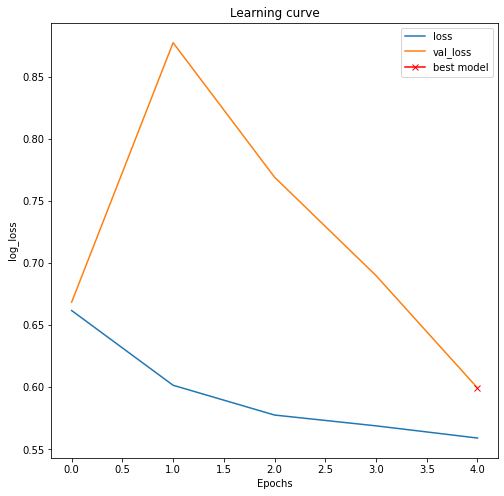

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

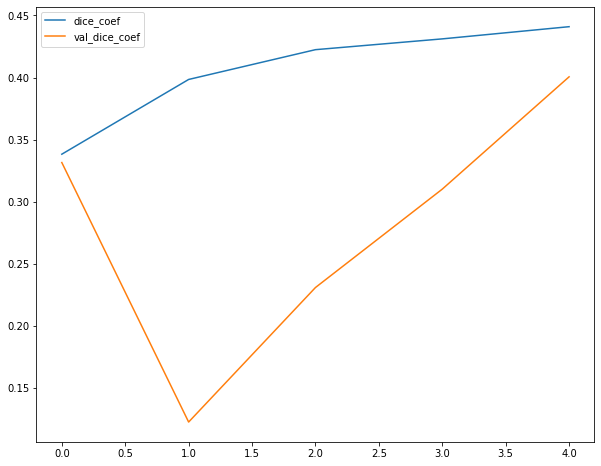

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(results.history['dice_coef'],label='dice_coef')
plt.plot(results.history['val_dice_coef'],label='val_dice_coef')
plt.legend()
     

In [ ]:
def plot_sample1():
    """Function to plot the results"""
    
    fig, ax = plt.subplots(1, 3, figsize=(20, 20))
    folder_path = '/usr/stage_2_train_images/stage_2_train_images'
    csv_path = "/content/drive/MyDrive/AIML CAPSTONE/CV capstone dataset/stage_2_train_labels.csv" 
    #loading a random image

    ix = random.randint(0, len(ids))
    image_name = ids[ix]
    ds = dicom.dcmread(os.path.join(folder_path, image_name))
    pixel_array_numpy = ds.pixel_array
    x_img = pixel_array_numpy

    # Draw masks
    mask = np.zeros((1024, 1024, 1), dtype = "uint8")

    image_name = os.path.splitext(image_name)[0]
    image_name = image_name.strip()

    sheet = open(csv_path, newline='')
    reader = csv.reader(sheet)
    for row in reader:
        if row[0]==image_name:
          if row[5]=='1':
            pt1 = (int(row[1].split('.')[0]),int(row[2].split('.')[0]))
            pt2 = (int(row[1].split('.')[0])+int(row[3].split('.')[0]),int(row[2].split('.')[0])+int(row[4].split('.')[0]))
            cv2.rectangle(mask, pt1, pt2, (255), -1)     
    sheet.close()
    mask = resize(mask, (im_height, im_width, 1), mode = 'constant', preserve_range = True)

    #ground truth plot---------------------------------------------------------

    ax[0].imshow(x_img, cmap='gray', interpolation = 'bilinear')
    #ax[0].contour(mask.squeeze(), colors='black', levels=[0.5])
    ax[0].set_title('x_ray ground truth')

    #Mask ground truth plot---------------------------------------------------

    ax[1].imshow(mask.squeeze(), cmap='gray')
    ax[1].set_title('Mask ground truth')

    #Predicted mask plot --------------------------------------------------

    x_img = resize(x_img, (256, 256), mode = 'constant', preserve_range = True)
    img = np.expand_dims(x_img, axis=-1)
    x_test= np.zeros((1, 256, 256, 1), dtype=np.uint8)
    x_test[0]=img

    pred_test= model.predict(x_test, verbose=1)
    pred_test = np.argmax(pred_test, axis=-1)
    pred_test = pred_test[0]
    print(pred_test.shape)
    for i in range(pred_test.shape[0]):
            for j in range(pred_test.shape[1]):
                if pred_test[i][j] == 1:
                    pred_test[i][j] = 255
                else:
                    pred_test[i][j] = 0
    pred_test = cv2.merge((pred_test,pred_test, pred_test))
    '''
    contours, hierarchy = cv2.findContours(pred_test,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for each_contour in contours:
        x,y,w,h = cv2.boundingRect(each_contour)
        cv2.rectangle(pred_test,(x,y),(x+w,y+h),(0,0,255),4)
        print (x,y,w,h)
    '''
    ax[2].imshow(pred_test, cmap='gray')
    
    ax[2].set_title('Predicted x_ray')
     

In [ ]:
ids = os.listdir(images_path)
print(len(ids))

26684


1/1 [==============================] - 1s 789ms/step
(256, 256)
1/1 [==============================] - 0s 159ms/step
(256, 256)
1/1 [==============================] - 0s 154ms/step
(256, 256)
1/1 [==============================] - 0s 147ms/step
(256, 256)
1/1 [==============================] - 0s 150ms/step
(256, 256)


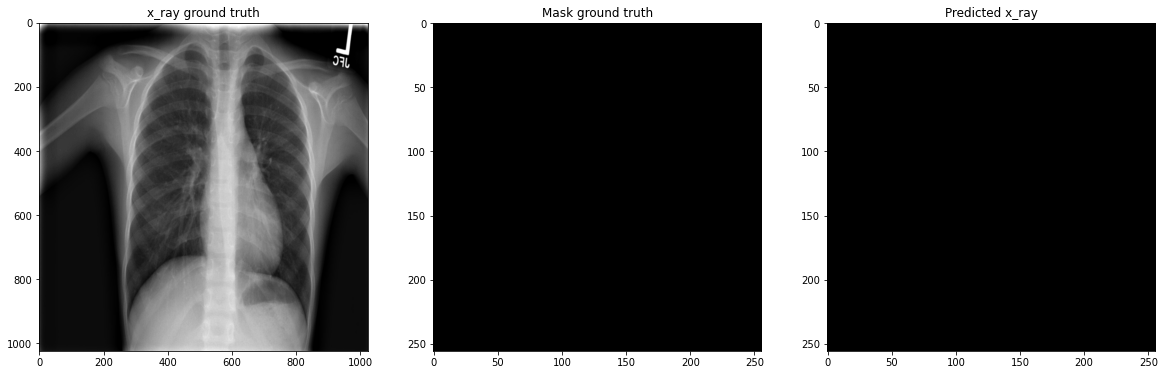

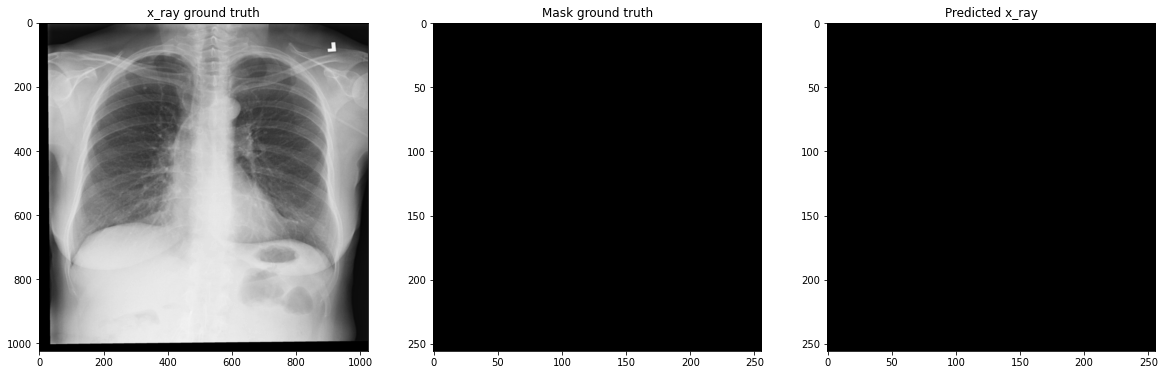

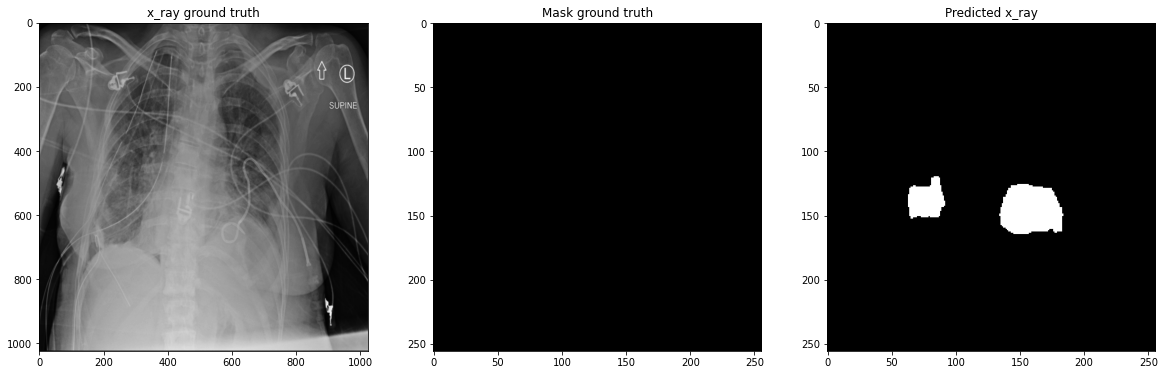

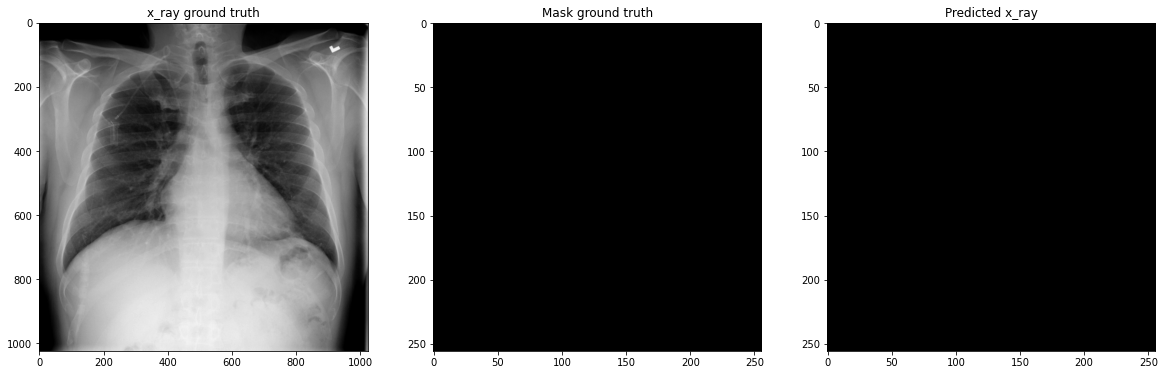

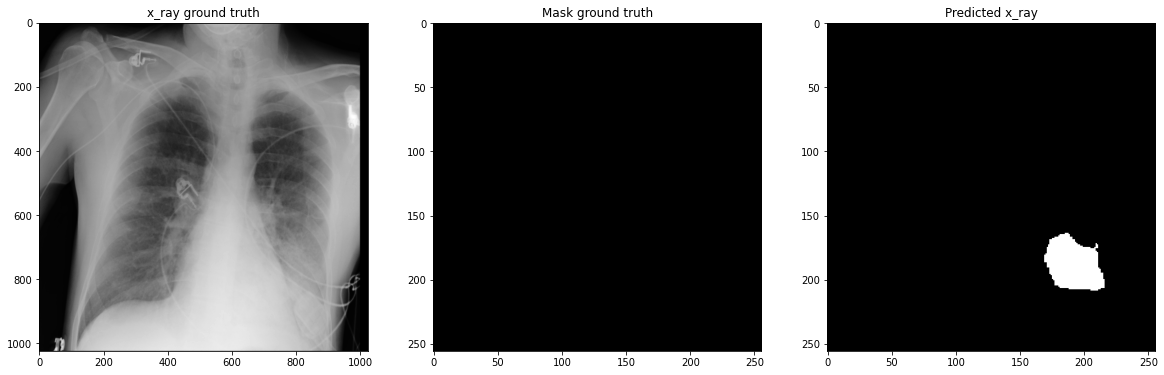

In [ ]:
for i in range(5):plot_sample1()

## Step 4: Pickle the model for future prediction

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('/usr/rcnnmodel.pkl','wb'))

In [ ]:
import shutil

In [ ]:
shutil.copy('/usr/rcnnmodel.pkl', '/content/drive/MyDrive/AIML CAPSTONE/FRCNN/rcnnmodel.pkl')

'/content/drive/MyDrive/AIML CAPSTONE/FRCNN/rcnnmodel.pkl'

In [ ]:
shutil.copy('/content/drive/MyDrive/AIML CAPSTONE/Milestone 1/CapstoneProject_FRCNN2.ipynb','/content/drive/MyDrive/AIML CAPSTONE/Milestone 1/CapstoneProject_FRCNN2.ipynb')